In [2]:
#reload when modified
%load_ext autoreload
%autoreload 2

In [3]:
import svist4get as sv4g
import pandas as pd
from IPython.display import Image, display
from svist4get_extension.util import *
import os
import re
import tqdm

In [4]:
_ABS_PATH = os.path.join('')
_GFF = os.path.join('genomes','tb927_10','tb927_10.gff')
_GTF = os.path.join('genomes','tb927_10','tb927_10.gtf')
_GENOME = os.path.join('genomes','tb927_10','tb927_10.fa')
_FIG_OUT = !pwd 
_FIG_OUT=_FIG_OUT[0]+'/fig_out'
_FIG_OUT

'/cluster/majf_lab/mtinti/Anna_DH/F21FTSEUHT0831_TRYxdpqR/fig_out'

In [5]:
_FIG_OUT

'/cluster/majf_lab/mtinti/Anna_DH/F21FTSEUHT0831_TRYxdpqR/fig_out'

In [6]:
!pwd

/cluster/majf_lab/mtinti/Anna_DH/F21FTSEUHT0831_TRYxdpqR


In [7]:
!cp -r genomes $TMPDIR
!cp -r svist4getConf $TMPDIR
!ls $TMPDIR

03_mark_duplicates  genomes  svist4getConf


In [8]:
%%bash
for i in {'Ald2','Ald4','VSG221_2','VSG221_4'}
do
cp ${i}/res/${i}/${i}_sorted_dedup.bed.gz $TMPDIR
gzip -df $TMPDIR/${i}_sorted_dedup.bed.gz

done



In [9]:
%%bash
for i in {'Ald2','Ald4','VSG221_2','VSG221_4'}
do
cp ${i}/res/${i}/${i}_sorted_dedup_F_plus_R.bed.gz $TMPDIR
gzip -df $TMPDIR/${i}_sorted_dedup_F_plus_R.bed.gz

done




In [10]:
#%%bash
#base_fastq='var_1'
#echo $base_fastq
#out=$base_fastq'_extend'
#echo $out
#base_fastq='var_2'
#echo $base_fastq
#echo $out

In [11]:
#!rm $TMPDIR/all_927_F_plus_R_SL.bed
!cp ../../polisome/all_927_F_plus_R_SL.bed.gz $TMPDIR && gzip -df $TMPDIR/all_927_F_plus_R_SL.bed.gz
#!rm $TMPDIR/all_927_F_plus_R_PoliA.bed
!cp ../../polisome/all_F_plus_R_PoliA.bed.gz $TMPDIR && gzip -df $TMPDIR/all_F_plus_R_PoliA.bed.gz

In [12]:
!ls $TMPDIR -l

total 867732
drwxr-xr-x 2 mtinti lsd      4096 Mar  2 10:27 03_mark_duplicates
-rw-r--r-- 1 mtinti lsd 139660153 Mar  3 14:39 Ald2_sorted_dedup.bed
-rw-r--r-- 1 mtinti lsd  70427458 Mar  3 14:39 Ald2_sorted_dedup_F_plus_R.bed
-rw-r--r-- 1 mtinti lsd 106832857 Mar  3 14:39 Ald4_sorted_dedup.bed
-rw-r--r-- 1 mtinti lsd  50978552 Mar  3 14:39 Ald4_sorted_dedup_F_plus_R.bed
-rw-r--r-- 1 mtinti lsd 139471487 Mar  3 14:39 all_927_F_plus_R_SL.bed
-rw-r--r-- 1 mtinti lsd  73247507 Mar  3 14:39 all_F_plus_R_PoliA.bed
lrwxrwxrwx 1 mtinti lsd        47 Mar  3 14:39 genomes -> /cluster/home/mtinti/RNAseq/viper-test/genomes/
lrwxrwxrwx 1 mtinti lsd        49 Mar  3 14:39 svist4getConf -> /cluster/home/mtinti/RNAseq/viper-test/svist4get/
-rw-r--r-- 1 mtinti lsd 117314277 Mar  3 14:39 VSG221_2_sorted_dedup.bed
-rw-r--r-- 1 mtinti lsd  66434241 Mar  3 14:39 VSG221_2_sorted_dedup_F_plus_R.bed
-rw-r--r-- 1 mtinti lsd  82479699 Mar  3 14:39 VSG221_4_sorted_dedup.bed
-rw-r--r-- 1 mtinti lsd  41686905 Mar 

In [13]:
#cat $TMPDIR/genomes/tb927_10/tb927_10.gff | head -n 500

In [14]:
#!less $TMPDIR/all_927_F_plus_R_PoliA.bed

In [15]:
temp_dir = !echo $TMPDIR
temp_dir=temp_dir[0]
temp_dir

'/tmp/1113775.1.all.q'

In [16]:
!mkdir -p $TMPDIR/fig_out

In [17]:
fig_out = !echo $TMPDIR/fig_out
fig_out=fig_out[0]
fig_out

'/tmp/1113775.1.all.q/fig_out'

In [18]:
labels = ['Ald2','Ald4']


In [19]:

_ABS_PATH = temp_dir

exp_dict = {
    'paperFig':dict(
        path_to_config='svist4getConf/svist4get_data/A4_p2.cfg',
        gtf_file=  os.path.join(_ABS_PATH,_GTF),
        fasta_file= os.path.join(_ABS_PATH,_GENOME),
        bedgraph_label = ['Ald2','Ald4'],
        bedgraph_color = ['yellow']+['blue'],
        paths_to_bedgraphs = [
            os.path.join(_ABS_PATH, 'Ald2_sorted_dedup.bed'),
            os.path.join(_ABS_PATH, 'Ald4_sorted_dedup.bed'),
            #os.path.join(_ABS_PATH, 'H4_KO_c8_sorted_pc_bg.bed'),
            
            
            
        ],
    ),
    
    
    
        'paperFigBar':dict(
        path_to_config='svist4getConf/svist4get_data/A4_p2.cfg',
        gtf_file=  os.path.join(_ABS_PATH,_GTF),
        fasta_file= os.path.join(_ABS_PATH,_GENOME),
        bedgraph_label = ['Ald2','Ald4','Ald2_b','Ald4_b','VSG221_2','VSG221_4','VSG221_2_b','VSG221_4_b'],
        bedgraph_color = ['yellow']*2+['blue']*2+['yellow']*2+['blue']*2,
        paths_to_bedgraphs = [
            os.path.join(_ABS_PATH, 'Ald2_sorted_dedup.bed'),
            os.path.join(_ABS_PATH, 'Ald4_sorted_dedup.bed'),
            os.path.join(_ABS_PATH, 'Ald2_sorted_dedup_F_plus_R.bed'),
            os.path.join(_ABS_PATH, 'Ald4_sorted_dedup_F_plus_R.bed'),
            
            os.path.join(_ABS_PATH, 'VSG221_2_sorted_dedup.bed'),
            os.path.join(_ABS_PATH, 'VSG221_4_sorted_dedup.bed'),
            os.path.join(_ABS_PATH, 'VSG221_2_sorted_dedup_F_plus_R.bed'),
            os.path.join(_ABS_PATH, 'VSG221_4_sorted_dedup_F_plus_R.bed'),            
            #os.path.join(_ABS_PATH, 'H4_KO_c8_sorted_pc_bg.bed'),
            
            
            
        ],
    ),


    'paperFigSL':dict(
        path_to_config='svist4getConf/svist4get_data/A4_p2.cfg',
        gtf_file=  os.path.join(_ABS_PATH,_GTF),
        fasta_file= os.path.join(_ABS_PATH,_GENOME),
        bedgraph_label = labels+['PoliA','SL'],
        bedgraph_color = ['yellow']+['blue']*2+['red']+['orange'],
        paths_to_bedgraphs = [
            os.path.join(_ABS_PATH, '2T1_T7_Cas9_sorted_pc_bg.bed'),
            os.path.join(_ABS_PATH, 'H4_KO_c1_sorted_pc_bg.bed'),
            os.path.join(_ABS_PATH, 'H4_KO_c8_sorted_pc_bg.bed'),
            os.path.join(_ABS_PATH, 'all_F_plus_R_PoliA.bed') ,
            os.path.join(_ABS_PATH, 'all_927_F_plus_R_SL.bed') ,            
            
            
        ],
    ),

       
}
exp_dict

{'paperFig': {'path_to_config': 'svist4getConf/svist4get_data/A4_p2.cfg',
  'gtf_file': '/tmp/1113775.1.all.q/genomes/tb927_10/tb927_10.gtf',
  'fasta_file': '/tmp/1113775.1.all.q/genomes/tb927_10/tb927_10.fa',
  'bedgraph_label': ['Ald2', 'Ald4'],
  'bedgraph_color': ['yellow', 'blue'],
  'paths_to_bedgraphs': ['/tmp/1113775.1.all.q/Ald2_sorted_dedup.bed',
   '/tmp/1113775.1.all.q/Ald4_sorted_dedup.bed']},
 'paperFigBar': {'path_to_config': 'svist4getConf/svist4get_data/A4_p2.cfg',
  'gtf_file': '/tmp/1113775.1.all.q/genomes/tb927_10/tb927_10.gtf',
  'fasta_file': '/tmp/1113775.1.all.q/genomes/tb927_10/tb927_10.fa',
  'bedgraph_label': ['Ald2',
   'Ald4',
   'Ald2_b',
   'Ald4_b',
   'VSG221_2',
   'VSG221_4',
   'VSG221_2_b',
   'VSG221_4_b'],
  'bedgraph_color': ['yellow',
   'yellow',
   'blue',
   'blue',
   'yellow',
   'yellow',
   'blue',
   'blue'],
  'paths_to_bedgraphs': ['/tmp/1113775.1.all.q/Ald2_sorted_dedup.bed',
   '/tmp/1113775.1.all.q/Ald4_sorted_dedup.bed',
   '/tmp/

In [20]:
#create a dictionary of gene to desc
#from the gff file
def make_desc(_GFF):
    gff =pd.read_csv(os.path.join(_GFF), sep='\t', header=None, comment='#')
    #print(gff.head())
    gff = gff[gff.iloc[:,-1].str.contains('description=')]
    desc = {}
    #print(gff.head())
    for n in gff.iloc[:,-1]:
        n=n.replace('%2C',' ')
        item_list = n.split(';')
        #print (item_list)
        temp_dict = {}
        for m in item_list:
            #print(m)
            temp_dict[m.split('=')[0].strip()]=m.split('=')[1].strip()
        #print(temp_dict['ID'])
        #print(temp_dict['description'])
        desc[temp_dict['ID']]=temp_dict.get('description','none')
    return desc

desc_dict = make_desc(_GFF)
desc_dict['Tb927.11.8750']

'hypothetical protein  conserved'

In [39]:

def intersect(indata):
    b,s,o=indata[0],indata[1],indata[2]
    """
    b='bed file name'
    s='string with region in bed format'
    o='out name bed'
    """
    b = pybedtools.BedTool(b)
    s = pybedtools.BedTool(s, from_string=True)
    b = b.intersect(s, nonamecheck=True)
    b.saveas(o)

def plot_genep(gene, max_cov='auto', 
               extend=1, exp='BSF', 
               do_display=True, limit=None,
               gtf=False,add_aa=True,bg_groups=[]):
    import tempfile
    try:
        desc = ' '+desc_dict.get(gene,gene)
        pa = init_pa(exp_dict, exp=exp)
        #doing this two times
        pa = add_gene(gene, desc, pa, extend=extend, out=fig_out, always_forward=True)


        s='\t'.join([str(n) for n in pa.config['window']])

        #os.makedirs('test_out')
        bg=[n for n in pa.config['bedgraph']]
        ss = [s for n in range(len(bg))]
        temp_folder_out = tempfile.TemporaryDirectory().name
        os.makedirs(temp_folder_out)

        out = [os.path.join(temp_folder_out,n.split('/')[-1]) for n in bg]
        #print(out)
        indata =[[a[0],a[1],a[2]] for a in zip(bg,ss,out)]
        with Pool(9) as p:
            p.map(intersect, indata)

        pa.config['bedgraph'] = out
        bg_df_list = [pd.read_csv(n,sep='\t',
                                  header=None,
                                  names = ['chr','start','end','cov'])
                      for n in pa.config['bedgraph']]
        
        print()
        if max_cov=='auto':
            max_cov = find_max_coverage_in_gene(gene, pa, bg_df_list)
            #print(max_cov)
            pa.config['bedgraph_upper_limit'] =  [max_cov for n in pa.config['bedgraph']]

        if max_cov=='region':
            if len(bg_groups)==0:
                max_cov = find_max_coverage_in_region(gene, pa, bg_df_list, extend=extend)
                pa.config['bedgraph_upper_limit'] =  [max_cov for n in pa.config['bedgraph']]
            else:
                parz_cov = []
                for group in bg_groups:
                    print(group)
                    parz_bed = [bg_df_list[n] for n in group]
                
                    max_cov = find_max_coverage_in_gene(gene, pa, parz_bed)
                    if len(group)==1:
                        parz_cov+=[max_cov]
                    else:
                        parz_cov+= [max_cov for n in group]
                pa.config['bedgraph_upper_limit'] =  parz_cov

        if max_cov=='limit':
            if isinstance(limit, int):
                pa.config['bedgraph_upper_limit']=[limit for n in pa.config['bedgraph']]
            else:
                pa.config['bedgraph_upper_limit']=limit


        pa.config['bedgraph_bar'] = 'none'#,'mean','mean','mean']#['none']
        pa.config['c_bedgraph_tracks']=exp_dict[exp]['bedgraph_color']
        pa.config['c_bedgraph_alpha'] = 0.35
        pa = add_gene(gene, desc, pa, extend=extend, out=fig_out)
        pa.config['output_filename'] = pa.config['output_filename']+'_'+exp

        if gtf:
            pa.config['gtf_file'] = gtf
        make_image(pa, do_display=do_display, add_aa=add_aa)
        shutil.rmtree(temp_folder_out)
        !rm $TMPDIR/*.tmp
        !rm $TMPDIR/magick-*
    #print(pa.config['output_filename'])
    except Exception as e:
        #print('error',gene,traceback.print_exc())
        open(os.path.join(fig_out,'/error_'+gene+'.txt'),'w').write(str(e)+'\n'+
                                                                   traceback.print_exc())
    
    
# c_bedgraph_tracks = pink,blue,green,yellow,purple,orange,brown,red

In [21]:
#find_max_coverage_in_region??

In [38]:
from multiprocessing import Pool
import multiprocessing
import tempfile
import shutil
import pybedtools
print(multiprocessing.cpu_count())
def plot_region(chrom, start, end, title, exp_dict=exp_dict,
                max_cov='auto', extend=1, exp='BSF', 
                do_display=True, limit=None,
                add_transcripts=False,gtf=False,add_aa=True,bg_groups=[]):
    
    #print(exp_dict[exp])
    pa = init_pa(exp_dict, exp=exp)
    pa.config['window'] = [chrom, start, end]
    pa.config['image_title'] = title
    pa.config['output_filename'] = os.path.join(fig_out, title)
    
    s='\t'.join([str(n) for n in pa.config['window']])
    bg=[n for n in pa.config['bedgraph']]
    ss = [s for n in range(len(bg))]
    temp_folder_out = tempfile.TemporaryDirectory().name
    os.makedirs(temp_folder_out)
    out = [os.path.join(temp_folder_out,n.split('/')[-1]) for n in bg]
    #print(out)
    indata =[[a[0],a[1],a[2]] for a in zip(bg,ss,out)]
    with Pool(9) as p:
        p.map(intersect, indata)
        
    pa.config['bedgraph'] = out
    bg_df_list = [pd.read_csv(n,sep='\t', header=None, names = ['chr','start','end','cov'])
                  for n in pa.config['bedgraph']]
    
    if max_cov=='auto':
        max_cov = find_max_coverage_in_gene(gene, pa, bg_df_list)
        #print(max_cov)
        pa.config['bedgraph_upper_limit'] =  [max_cov for n in pa.config['bedgraph']]

    if max_cov=='region':
        if len(bg_groups)==0:
            max_cov = find_max_coverage_in_region(gene, pa, bg_df_list, extend=extend)
            pa.config['bedgraph_upper_limit'] =  [max_cov for n in pa.config['bedgraph']]
        else:
            parz_cov = []
            for group in bg_groups:
                max_cov = find_max_coverage_in_region(gene, pa, group, extend=extend)

            pa.config['bedgraph_upper_limit'] =  parz_cov
                

    if max_cov=='limit':
        if isinstance(limit, int):
            pa.config['bedgraph_upper_limit']=[limit for n in pa.config['bedgraph']]
        else:
            pa.config['bedgraph_upper_limit']=limit
    
    pa.config['bedgraph_bar'] = 'none'#,'mean','mean','mean']#['none']
    pa.config['c_bedgraph_tracks']=exp_dict[exp]['bedgraph_color']
    pa.config['c_bedgraph_alpha'] = 0.35
    if gtf:
        pa.config['gtf_file'] = gtf
    make_image(pa, do_display=do_display, add_aa=add_aa, add_transcripts=add_transcripts)
    
    shutil.rmtree(temp_folder_out)
    #print(pa.config['gtf_file'])
    #!rm $TMPDIR/*.tmp
    #!rm $TMPDIR/magick-*    
    

64


In [28]:
from Bio import SeqIO
def get_len_chro():
    len_dict = {}
    for record in SeqIO.parse(_GENOME, "fasta"):
        len_dict[record.id]=len(record.seq)
    return len_dict
len_dict=get_len_chro()
len_dict

{'Tb927_01_v5.1': 1064672,
 'Tb927_02_v5.1': 1193948,
 'Tb927_03_v5.1': 1653225,
 'Tb927_04_v5.1': 1590432,
 'Tb927_05_v5.1': 1802303,
 'Tb927_06_v5.1': 1618915,
 'Tb927_07_v5.1': 2205233,
 'Tb927_08_v5.1': 2481190,
 'Tb927_09_v5.1': 3542885,
 'Tb927_10_v5.1': 4144375,
 'Tb927_11_v5.1': 5223313,
 'Tb927_11_LH_fork_v5.1': 14430,
 'Tb927_11_RH_fork_v5.1': 704210,
 'Tb927_11_Homologues_1_v5.1': 1952,
 'Tb927_11_Homologues_2_v5.1': 1546,
 'Tb927_11_Homologues_3_v5.1': 20408,
 '11L3_v3': 63482,
 '5K5_v5.1': 158740,
 'GTRYP_4071_4094-1a01.w2k4071': 18466,
 'TP26M21-2a10.p1k': 39798,
 'TP26P4-1a02.q1ka': 16439,
 'TP26P4-3b07.q1k': 56260,
 'TP26P4-5g04.p1k': 13060,
 'TP26P4-6c09.p1k': 25080,
 'TP29O12a-1b01.p1k': 29117,
 'TP3F6-6f06.p1k': 26266,
 'TP3F6-6h01.p1k': 13990,
 'TPB1C9-1a08.q1k': 11334,
 'Tb927_11_bin_v5.1': 5598354,
 'Tbrucei.chr8.100': 146393,
 'Tp_ends-39g01.p1k': 14693,
 'Tp_ends-40b06.q1k': 14708,
 'tryp_IXa-16h03.q1c': 11697,
 'tryp_IXb-1c10.p1c': 17644,
 'tryp_IXb-217g08.q1c'

In [29]:
def get_gene(item):
    for n in item.split(';'):
        if 'gene_id' in n:
            gene_id = n.split(' ')[1].strip('/"')
            return gene_id
    return 'none'


In [30]:
def get_mean_coverage(ref):
    bed_file, chro,start,end = ref[0],ref[1],ref[2],ref[3]
    temp = pd.read_csv(bed_file,sep='\t',header=None)
    temp.columns = ['chro','start','end','cov']
    temp = temp[temp['chro']==chro]
    temp = temp[temp['start']>start]
    temp = temp[temp['end']<end]
    if len(temp)==0:
        return 1
    return temp['cov'].mean()

In [31]:
!echo $TMPDIR
make_image??

/tmp/1113775.1.all.q


In [50]:
import numpy as np
def make_image(pa, do_display=False, add_aa=False, add_transcripts=True):
    #print("pa.config['gtf_file']", pa.config['gtf_file'])
    gtf = sv4g.data_processing.Gtf_helper(pa.config['gtf_file'])
    transcripts = gtf.extract_transcripts_from_widnow(*pa.config['window'])
    data_from_gtf = (gtf.extract_data_about_transcripts(transcripts))
    #print(data_from_gtf)
    pa.add_gtf_data(data_from_gtf)
    tracks = []
    tracks += sv4g.manager.Title_tracks_maker(pa).create_tracks()
    tracks += sv4g.manager.Axis_tics_tracks_maker(pa).create_tracks()
    tracks += sv4g.manager.Vgrid_tracks_maker(pa).create_tracks()
    if add_aa:
        tracks += sv4g.manager.Aa_seq_tracks_maker(pa).create_tracks()
    if add_transcripts:
        tracks += sv4g.manager.Transcript_struct_tracks_maker(pa).create_tracks()
    tracks += sv4g.manager.Bedgraph_tracks_maker(pa).create_tracks()
    sv4g.manager.Image(tracks, pa).draw()
    # converting the resulting pdf to a png file
    print(pa.config['output_filename'])
    pa.config['output_filename']=pa.config['output_filename']
    #sv4g.methods.pdf_page_to_png(pa)
    #if do_display:
    #   display(Image(filename=os.path.join(pa.config['output_filename']+'.png')))

def intersect(indata):
    b,s,o=indata[0],indata[1],indata[2]
    """
    b='bed file name'
    s='string with region in bed format'
    o='out name bed'
    """
    b = pybedtools.BedTool(b)
    s = pybedtools.BedTool(s, from_string=True)
    b = b.intersect(s, nonamecheck=True)
    
    b.saveas(o)

def plot_genep(gene, max_cov='auto', 
               extend=1, exp_dict=exp_dict,exp='BSF', 
               do_display=True, limit=None,
               gtf=False,add_aa=True,bg_groups=[],
              log_transform=False):
    #try:
    desc = ' '+desc_dict.get(gene,gene)
    pa = init_pa(exp_dict, exp=exp)
    #doing this two times
    pa = add_gene(gene, desc, pa, extend=extend, out=fig_out, always_forward=False)


    s='\t'.join([str(n) for n in pa.config['window']])

    #os.makedirs('test_out')
    bg=[n for n in pa.config['bedgraph']]
    ss = [s for n in range(len(bg))]
    temp_folder_out = tempfile.TemporaryDirectory().name
    os.makedirs(temp_folder_out)

    out = [os.path.join(temp_folder_out,n.split('/')[-1]) for n in bg]
    #print(out)
    indata =[[a[0],a[1],a[2]] for a in zip(bg,ss,out)]
    with Pool(9) as p:
        p.map(intersect, indata)
    
    #print(open(out[0]).read())
    pa.config['bedgraph'] = out
    
    #print(out)
    if log_transform:
        for n in pa.config['bedgraph']:
            temp = pd.read_csv(n,sep='\t',index_col=None,
                                  header=None,
                                  names = ['chr','start','end','cov'])
            #print(temp)
            temp['cov']=np.log1p(temp['cov']).astype(int)
            #print(temp)
            temp.to_csv(n,header=False,index=False,sep='\t')
    #print(open(out[0]).read())
        
    bg_df_list = [pd.read_csv(n,sep='\t',
                              header=None,
                              names = ['chr','start','end','cov'])
                  for n in pa.config['bedgraph']]

    #print(bg_df_list)
    if max_cov=='auto':
        max_cov = find_max_coverage_in_gene(gene, pa, bg_df_list)
        #print(max_cov)
        pa.config['bedgraph_upper_limit'] =  [max_cov for n in pa.config['bedgraph']]

    if max_cov=='region':
        if len(bg_groups)==0:
            #print('1',bg_df_list)
            #max_cov = find_max_coverage_in_region(gene, pa, bg_df_list, extend=extend)
            temp = pd.concat(bg_df_list)
            max_cov = temp['cov'].max() + (temp['cov'].max()*0.1)
            pa.config['bedgraph_upper_limit'] =  [max_cov for n in pa.config['bedgraph']]
        else:
            parz_cov = []
            for group in bg_groups:
                #print('2', group)
                parz_bed = [bg_df_list[n] for n in group]
                #print('3',parz_bed)
                temp = pd.concat(parz_bed)
                max_cov = temp['cov'].max() + (temp['cov'].max()*0.1)
                #max_cov = find_max_coverage_in_region(gene, pa, parz_bed, extend=extend)
                if len(group)==1:
                    parz_cov+=[max_cov]
                else:
                    parz_cov+= [max_cov for n in group]
            pa.config['bedgraph_upper_limit'] =  parz_cov

    if max_cov=='limit':
        if isinstance(limit, int):
            pa.config['bedgraph_upper_limit']=[limit for n in pa.config['bedgraph']]
        else:
            pa.config['bedgraph_upper_limit']=limit


    pa.config['bedgraph_bar'] = 'none'#,'mean','mean','mean']#['none']
    pa.config['c_bedgraph_tracks']=exp_dict[exp]['bedgraph_color']
    pa.config['c_bedgraph_alpha'] = 0.35
    pa = add_gene(gene, desc, pa, extend=extend, out=fig_out)
    pa.config['output_filename'] = pa.config['output_filename']+'_'+exp

    
    print(pa.config['output_filename'])
    if gtf:
        pa.config['gtf_file'] = gtf
    make_image(pa, do_display=do_display, add_aa=add_aa)
    shutil.rmtree(temp_folder_out)
    !rm $TMPDIR/*.tmp
    !rm $TMPDIR/magick-*
    #print(pa.config['output_filename'])
    #except Exception as e:
    #    print('error',gene,traceback.print_exc())
    #    open(os.path.join(fig_out,'/error_'+gene+'.txt'),'w').write(str(e)+'\n'+
                                                                   #traceback.print_exc())
    
    
# c_bedgraph_tracks = pink,blue,green,yellow,purple,orange,brown,red

In [33]:
sv4g.methods.pdf_page_to_png??

In [34]:
make_image??

In [35]:
!echo $TMPDIR

/tmp/1113775.1.all.q


In [70]:
#!cp $TMPDIR/fig_out/Tb927.8.3020_paperFigBar.pdf .

In [69]:
#from IPython.display import IFrame
#IFrame("Tb927.8.3020_paperFigBar.pdf", width=600, height=300)

In [68]:
#from wand.image import Image as WImage
#img = WImage(filename='/tmp/1113724.1.all.q/fig_out/Tb927.8.3020_paperFigBar.pdf')
#img

In [78]:
#Image?? 

In [77]:
#page = Image(filename='Tb927.8.3020_paperFigBar.pdf')

In [27]:
genes ='''
Tb927.8.3020
Tb927.10.11710
Tb927.5.3550
Tb927.10.1910
Tb927.11.7180
Tb927.8.7290
Tb927.7.6950
Tb927.10.7090
Tb927.11.5440
Tb927.8.2890
Tb927.11.6820
Tb927.11.12470
Tb927.11.16130
Tb927.11.6810
Tb927.9.7520
Tb927.9.15070
Tb927.8.2370
Tb927.5.610
Tb927.2.6240
Tb927.4.4710
Tb927.7.7280
Tb927.10.14000
Tb927.7.5150
Tb927.11.5050
Tb927.11.13360
Tb927.11.7218
Tb927.9.12150
Tb927.10.15610
Tb927.9.1530
Tb927.5.3330'''.split('\n')
genes[1:]

['Tb927.8.3020',
 'Tb927.10.11710',
 'Tb927.5.3550',
 'Tb927.10.1910',
 'Tb927.11.7180',
 'Tb927.8.7290',
 'Tb927.7.6950',
 'Tb927.10.7090',
 'Tb927.11.5440',
 'Tb927.8.2890',
 'Tb927.11.6820',
 'Tb927.11.12470',
 'Tb927.11.16130',
 'Tb927.11.6810',
 'Tb927.9.7520',
 'Tb927.9.15070',
 'Tb927.8.2370',
 'Tb927.5.610',
 'Tb927.2.6240',
 'Tb927.4.4710',
 'Tb927.7.7280',
 'Tb927.10.14000',
 'Tb927.7.5150',
 'Tb927.11.5050',
 'Tb927.11.13360',
 'Tb927.11.7218',
 'Tb927.9.12150',
 'Tb927.10.15610',
 'Tb927.9.1530',
 'Tb927.5.3330']

In [68]:
plot_genep('Tb927.6.2850', max_cov='limit', limit=[50000,50000,5000,5000,50000,50000,5000,5000],
                   extend=12, exp='paperFigBar', 
                   do_display=True, 
                
                   gtf=False, add_aa=False, bg_groups=[[0,1],[2,3],[4,5],[6,7]]
              )


/tmp/1113775.1.all.q/fig_out/Tb927.6.2850_paperFigBar
/tmp/1113775.1.all.q/fig_out/Tb927.6.2850_paperFigBar
rm: cannot remove ‘/tmp/1113775.1.all.q/magick-*’: No such file or directory


In [69]:
cp /tmp/1113775.1.all.q/fig_out/Tb927.6.2850_paperFigBar.pdf .


[0, 1]
[2, 3]
[4, 5]
[6, 7]


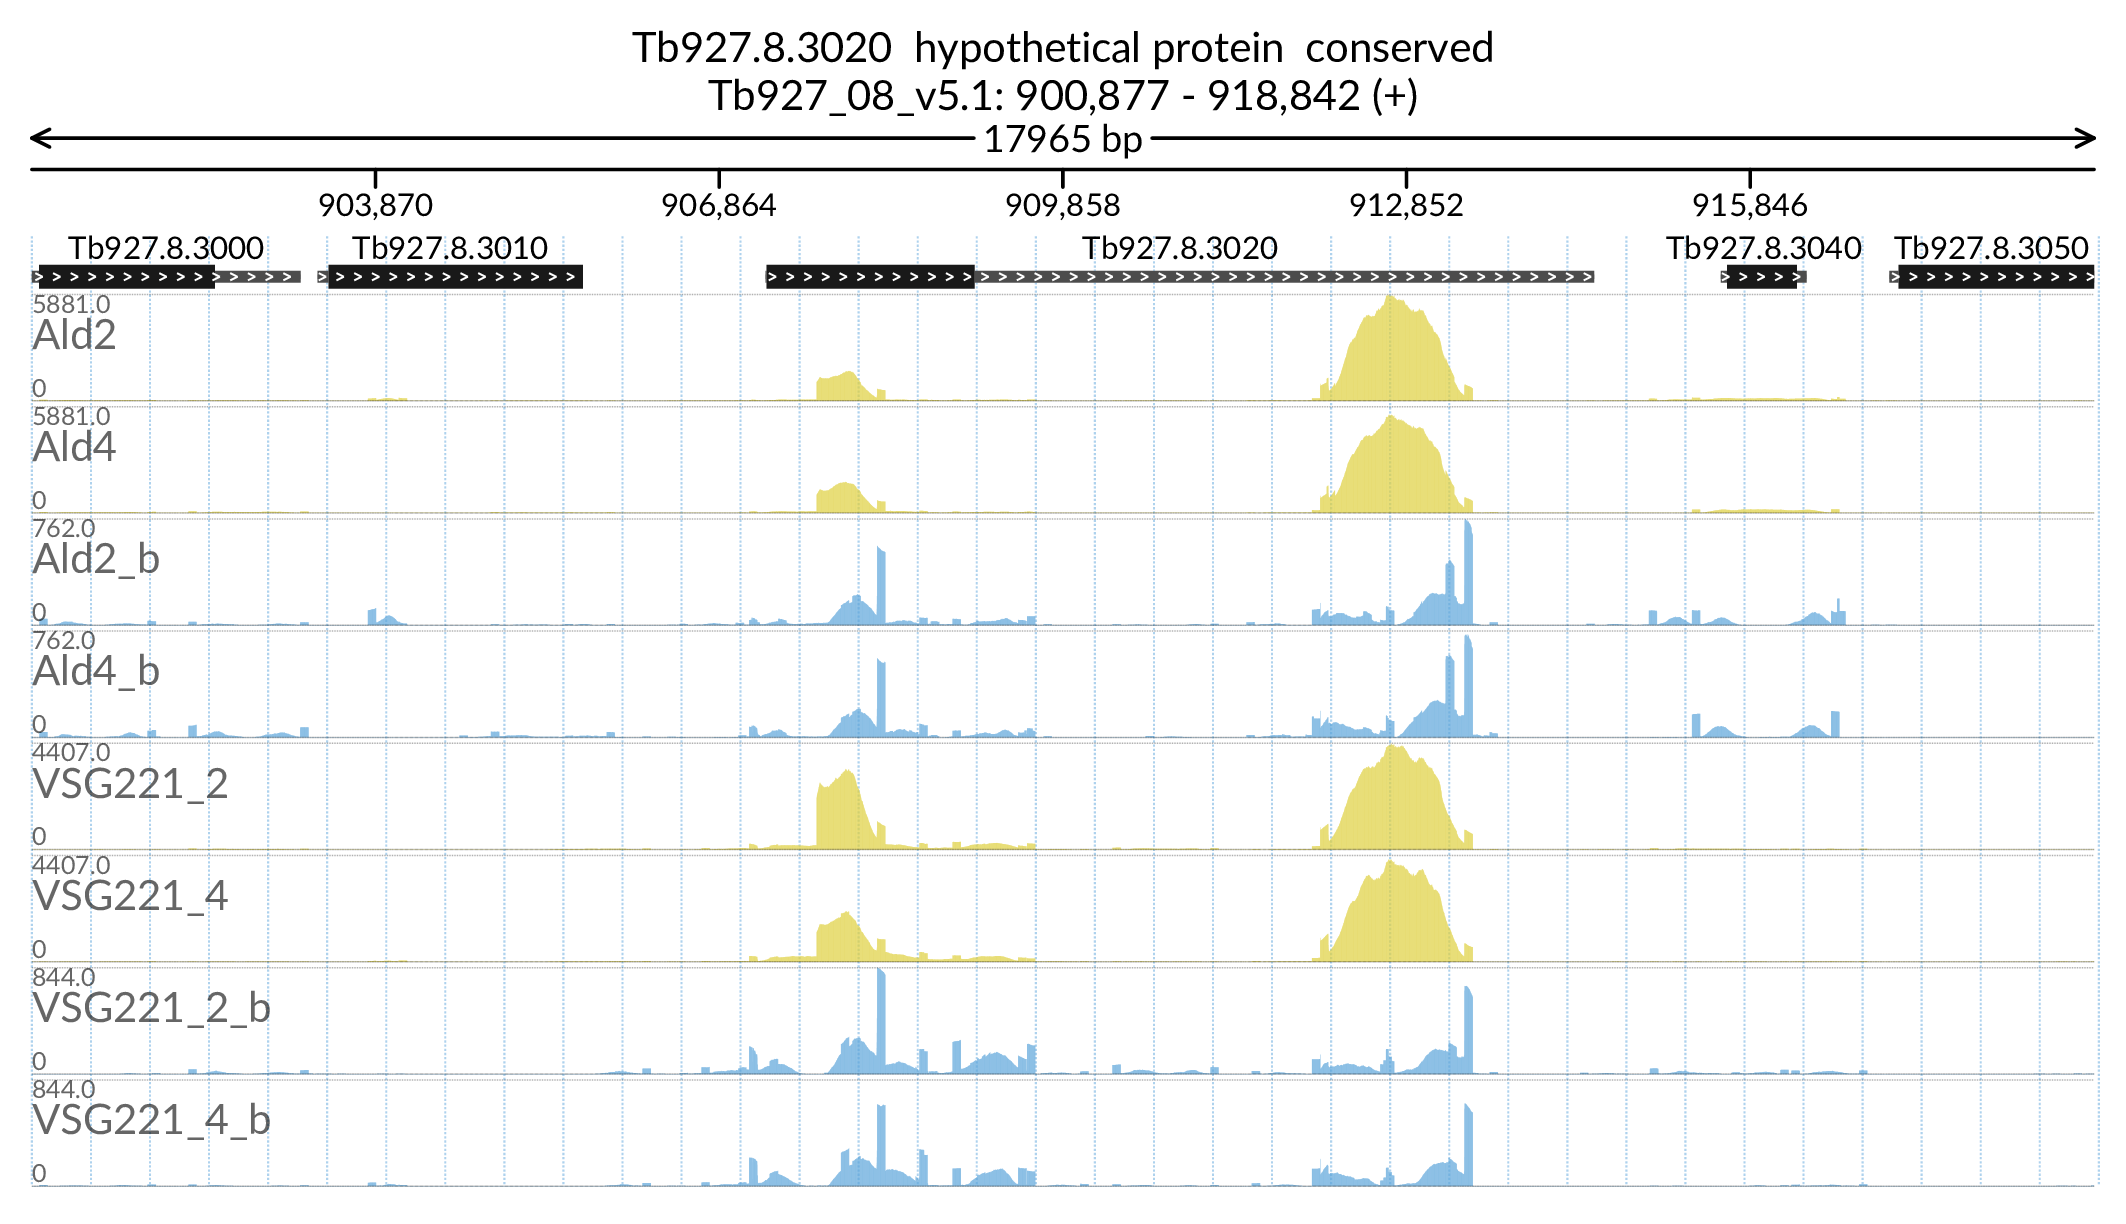

rm: cannot remove ‘/tmp/1113771.1.all.q/magick-*’: No such file or directory


In [28]:
for gene in genes[1:]:
    plot_genep(gene, max_cov='region', 
                   extend=2, exp='paperFigBar', 
                   do_display=True, limit=None,
                   max_cov=='region'
                   gtf=False, add_aa=False, bg_groups=[[0,1],[2,3],[4,5],[6,7]]
              )
    break

In [43]:
!tar -czvf fig.927.pdf.tar.gz $TMPDIR/fig_out/*.pdf --remove-files

tar: Removing leading `/' from member names
/tmp/1113724.1.all.q/fig_out/Tb927.10.11710_paperFigBar.pdf
/tmp/1113724.1.all.q/fig_out/Tb927.10.14000_paperFigBar.pdf
/tmp/1113724.1.all.q/fig_out/Tb927.10.15610_paperFigBar.pdf
/tmp/1113724.1.all.q/fig_out/Tb927.10.1910_paperFigBar.pdf
/tmp/1113724.1.all.q/fig_out/Tb927.10.7090_paperFigBar.pdf
/tmp/1113724.1.all.q/fig_out/Tb927.11.12470_paperFigBar.pdf
/tmp/1113724.1.all.q/fig_out/Tb927.11.13360_paperFigBar.pdf
/tmp/1113724.1.all.q/fig_out/Tb927.11.16130_paperFigBar.pdf
/tmp/1113724.1.all.q/fig_out/Tb927.11.5050_paperFigBar.pdf
/tmp/1113724.1.all.q/fig_out/Tb927.11.5440_paperFigBar.pdf
/tmp/1113724.1.all.q/fig_out/Tb927.11.6810_paperFigBar.pdf
/tmp/1113724.1.all.q/fig_out/Tb927.11.6820_paperFigBar.pdf
/tmp/1113724.1.all.q/fig_out/Tb927.11.7180_paperFigBar.pdf
/tmp/1113724.1.all.q/fig_out/Tb927.11.7218_paperFigBar.pdf
/tmp/1113724.1.all.q/fig_out/Tb927.2.6240_paperFigBar.pdf
/tmp/1113724.1.all.q/fig_out/Tb927.4.4710_paperFigBar.pdf
/tmp/111


[0, 1]
[2, 3]
[4, 5]
[6, 7]


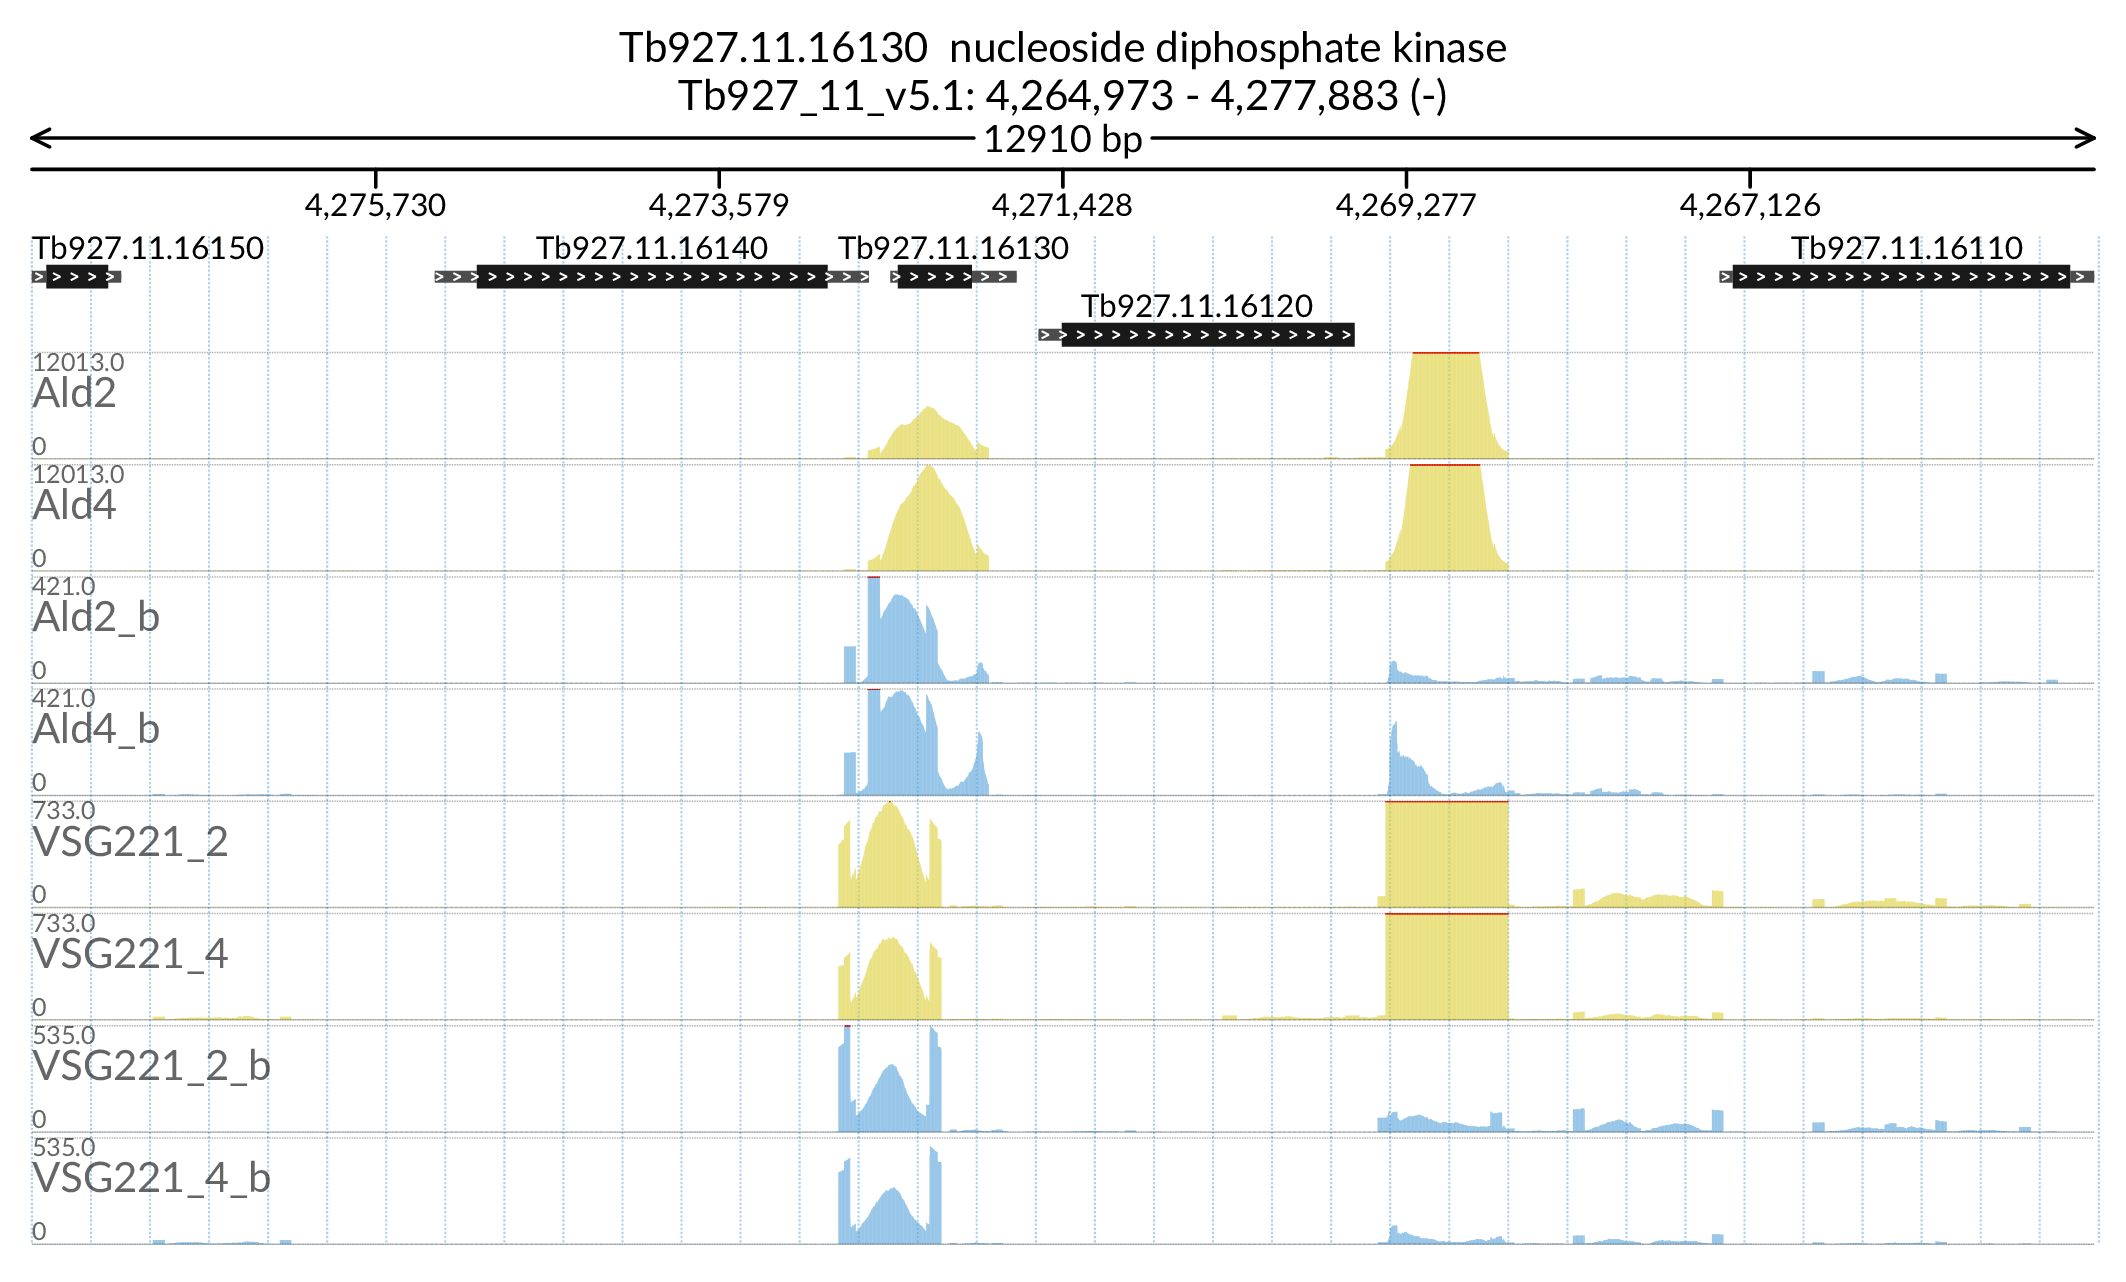

rm: cannot remove ‘/tmp/1075514.1.all.q/magick-*’: No such file or directory


In [48]:
plot_genep('Tb927.11.16130', max_cov='region', 
               extend=2, exp='paperFigBar', 
               do_display=True, limit=None,
            #max_cov=='region'
               gtf=False, add_aa=False, bg_groups=[[0,1],[2,3],[4,5],[6,7]]
          )

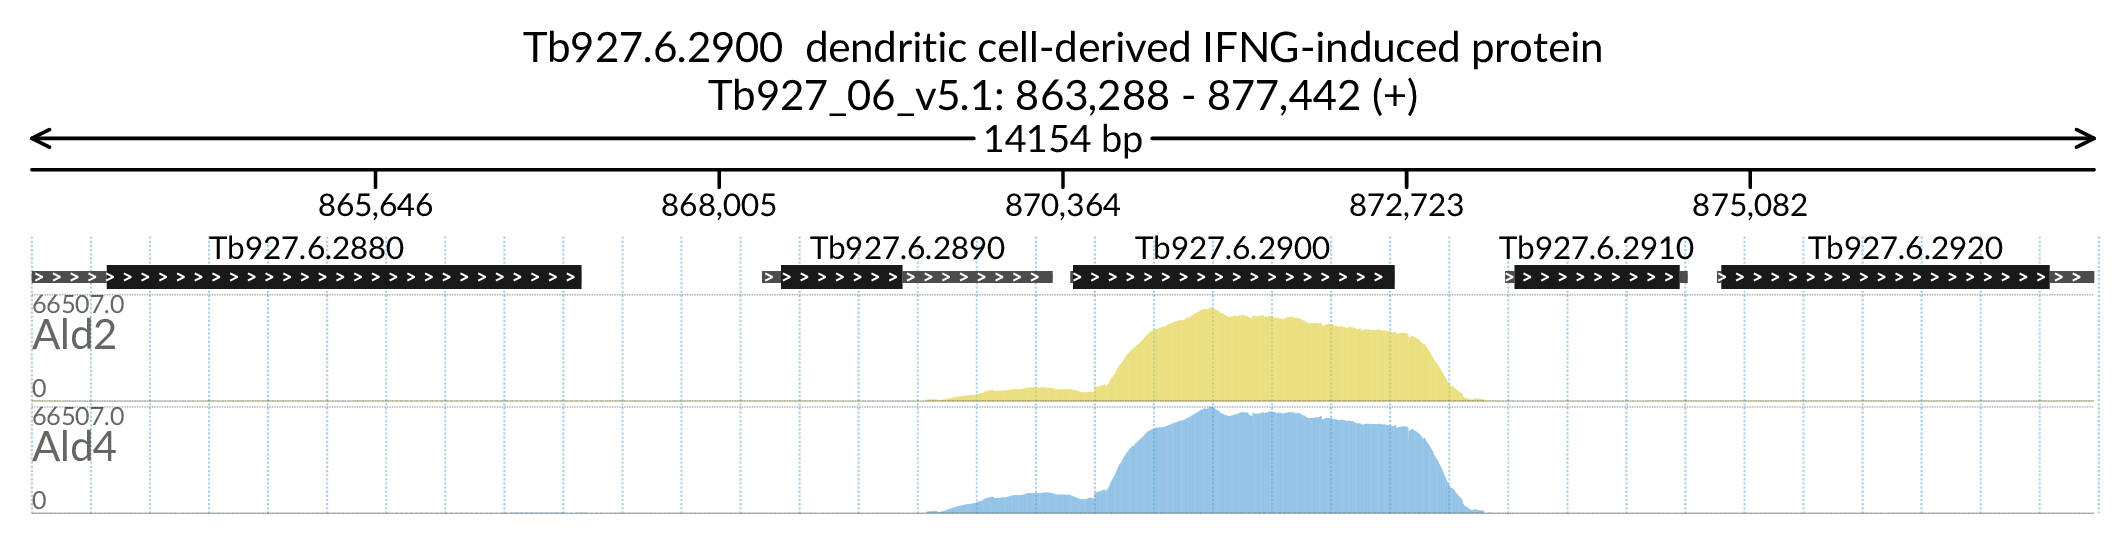

rm: cannot remove ‘/tmp/1075514.1.all.q/magick-*’: No such file or directory


In [49]:
plot_genep('Tb927.6.2900', max_cov='auto', 
               extend=2, exp='paperFig', 
               do_display=True, limit=None,
               gtf=False, add_aa=False, bg_groups=[1,2])


[0, 1]
[2, 3]
[4, 5]
[6, 7]


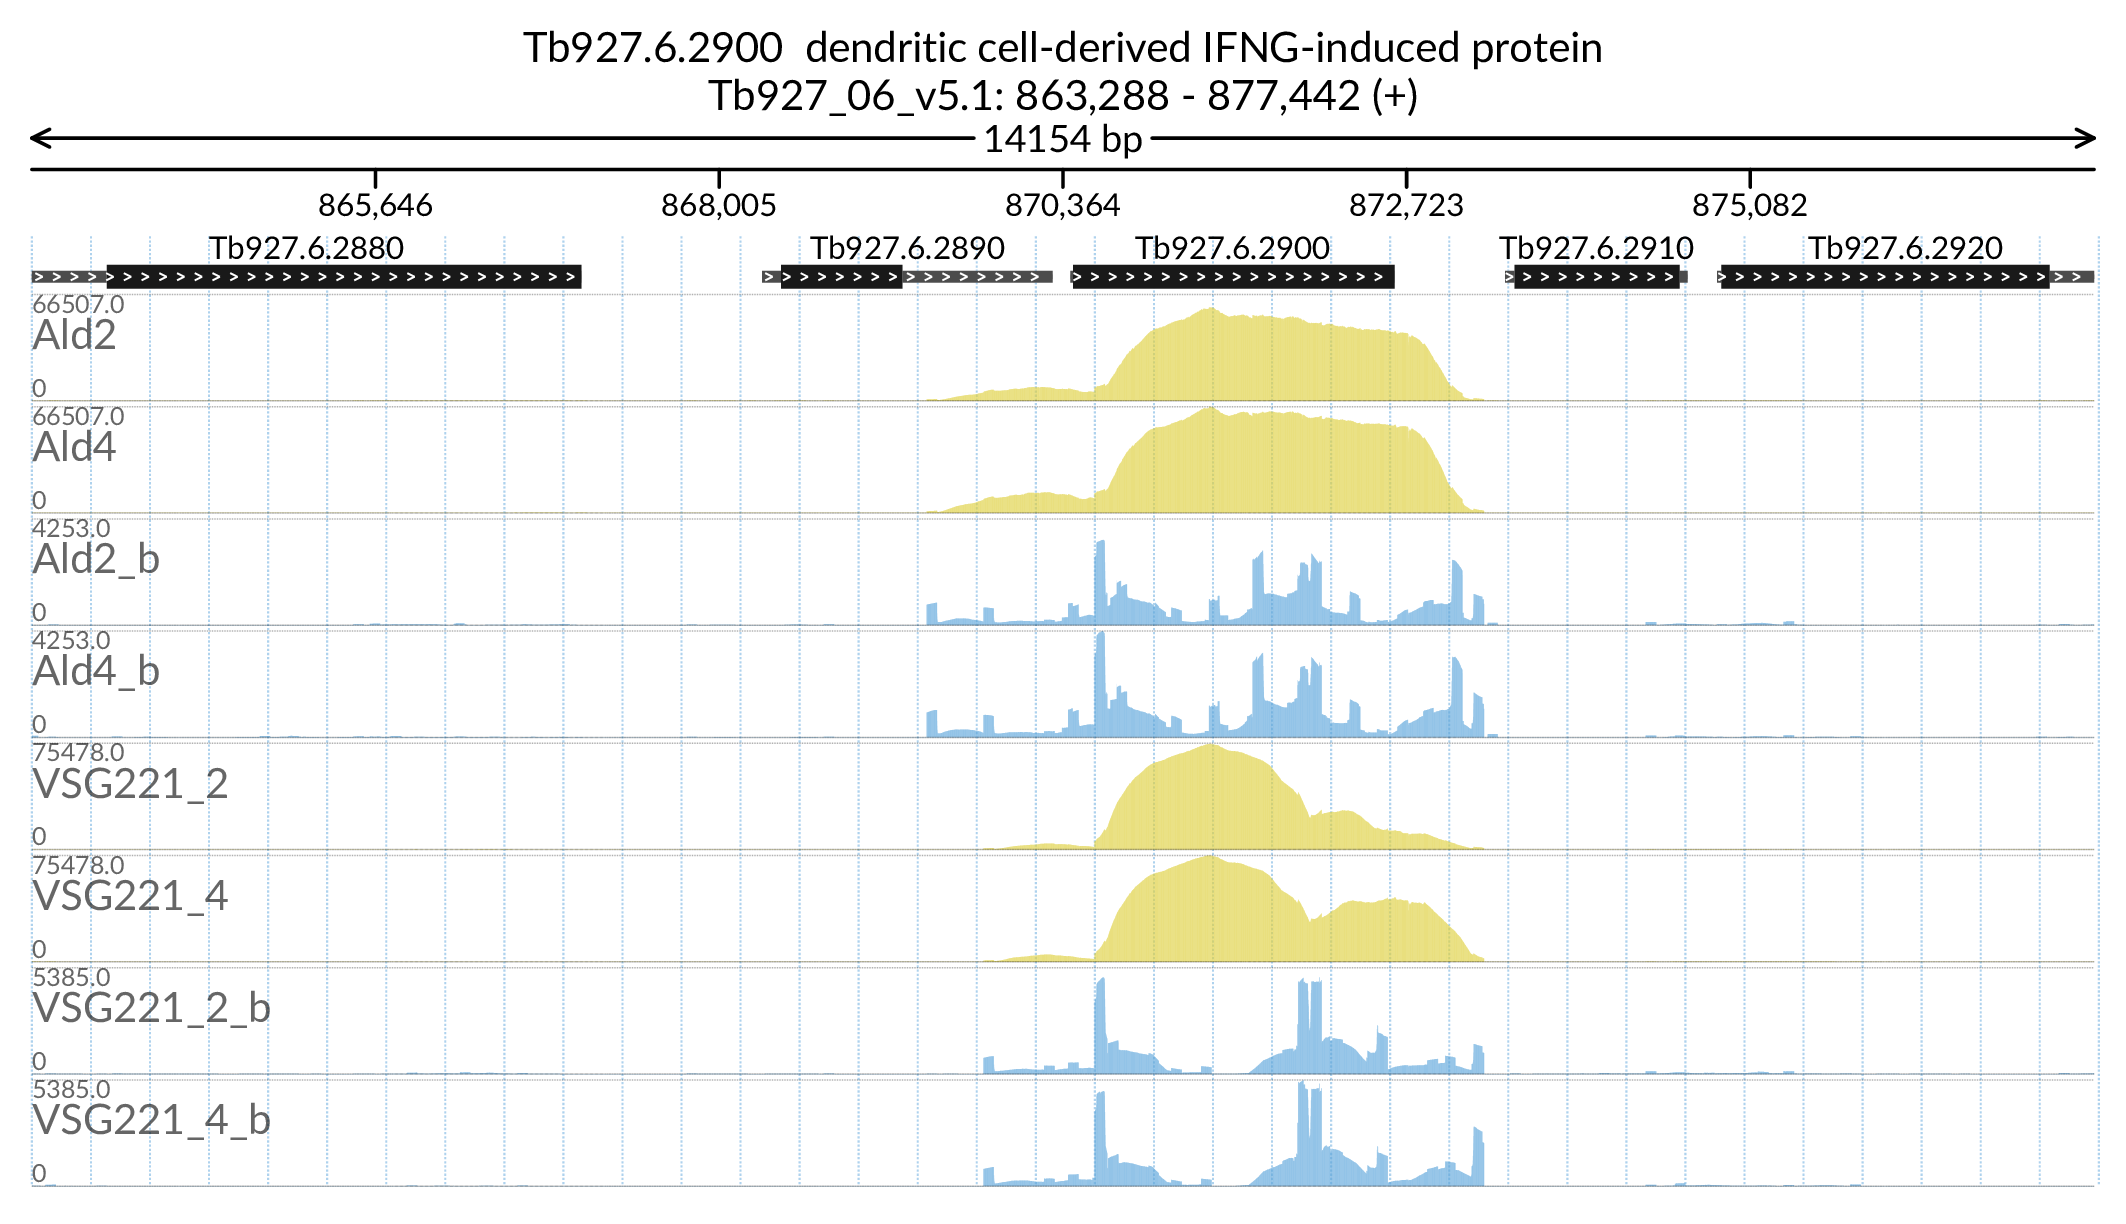

rm: cannot remove ‘/tmp/1075514.1.all.q/magick-*’: No such file or directory


In [50]:
plot_genep('Tb927.6.2900', max_cov='region', 
               extend=2, exp='paperFigBar', 
               do_display=True, limit=None,
            #max_cov=='region'
               gtf=False, add_aa=False, bg_groups=[[0,1],[2,3],[4,5],[6,7]]
          )


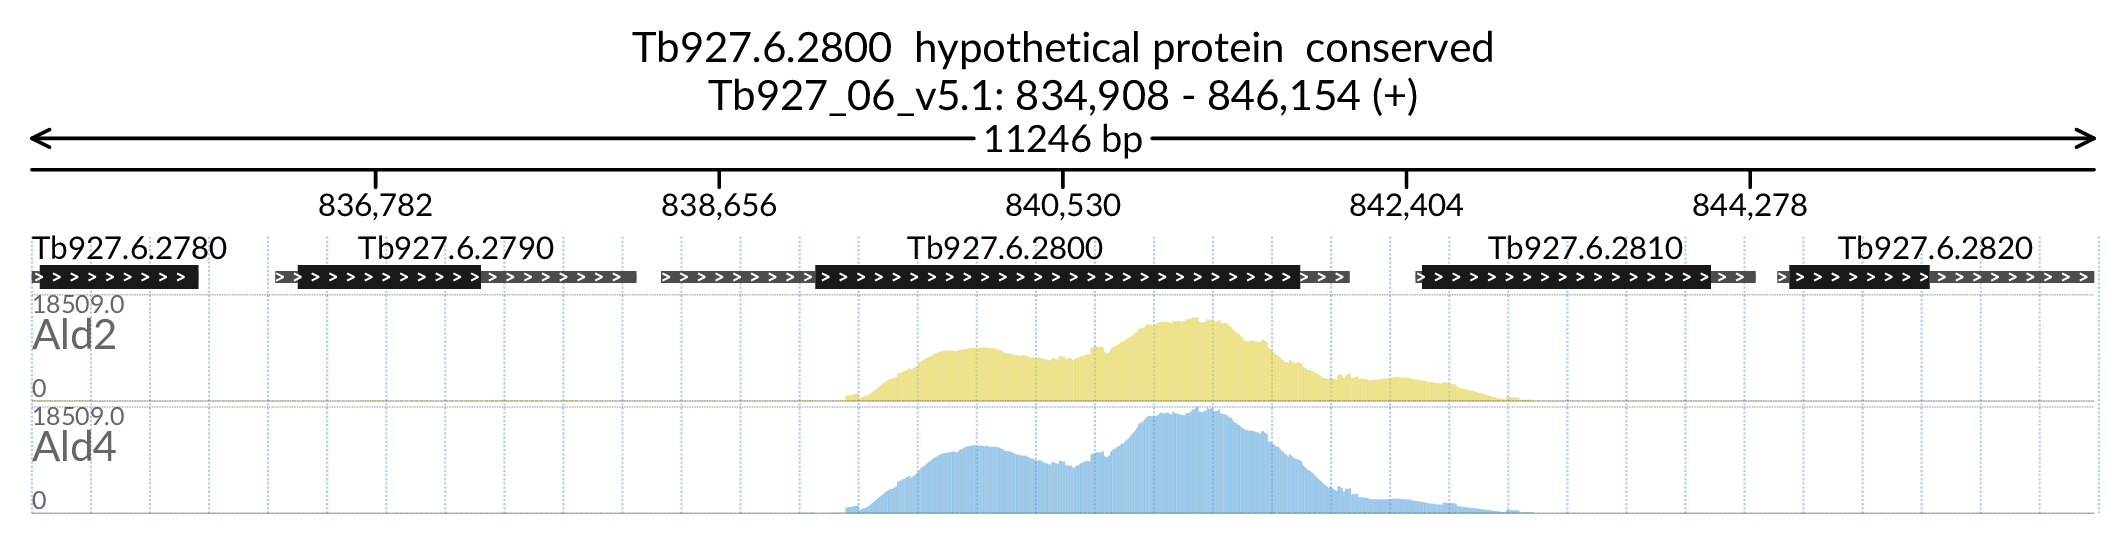

rm: cannot remove ‘/tmp/1075514.1.all.q/magick-*’: No such file or directory


In [51]:
plot_genep('Tb927.6.2800', max_cov='auto', 
               extend=2, exp='paperFig', 
               do_display=True, limit=None,
               gtf=False, add_aa=False, bg_groups=[1,2])


[0, 1]
[2, 3]
[4, 5]
[6, 7]


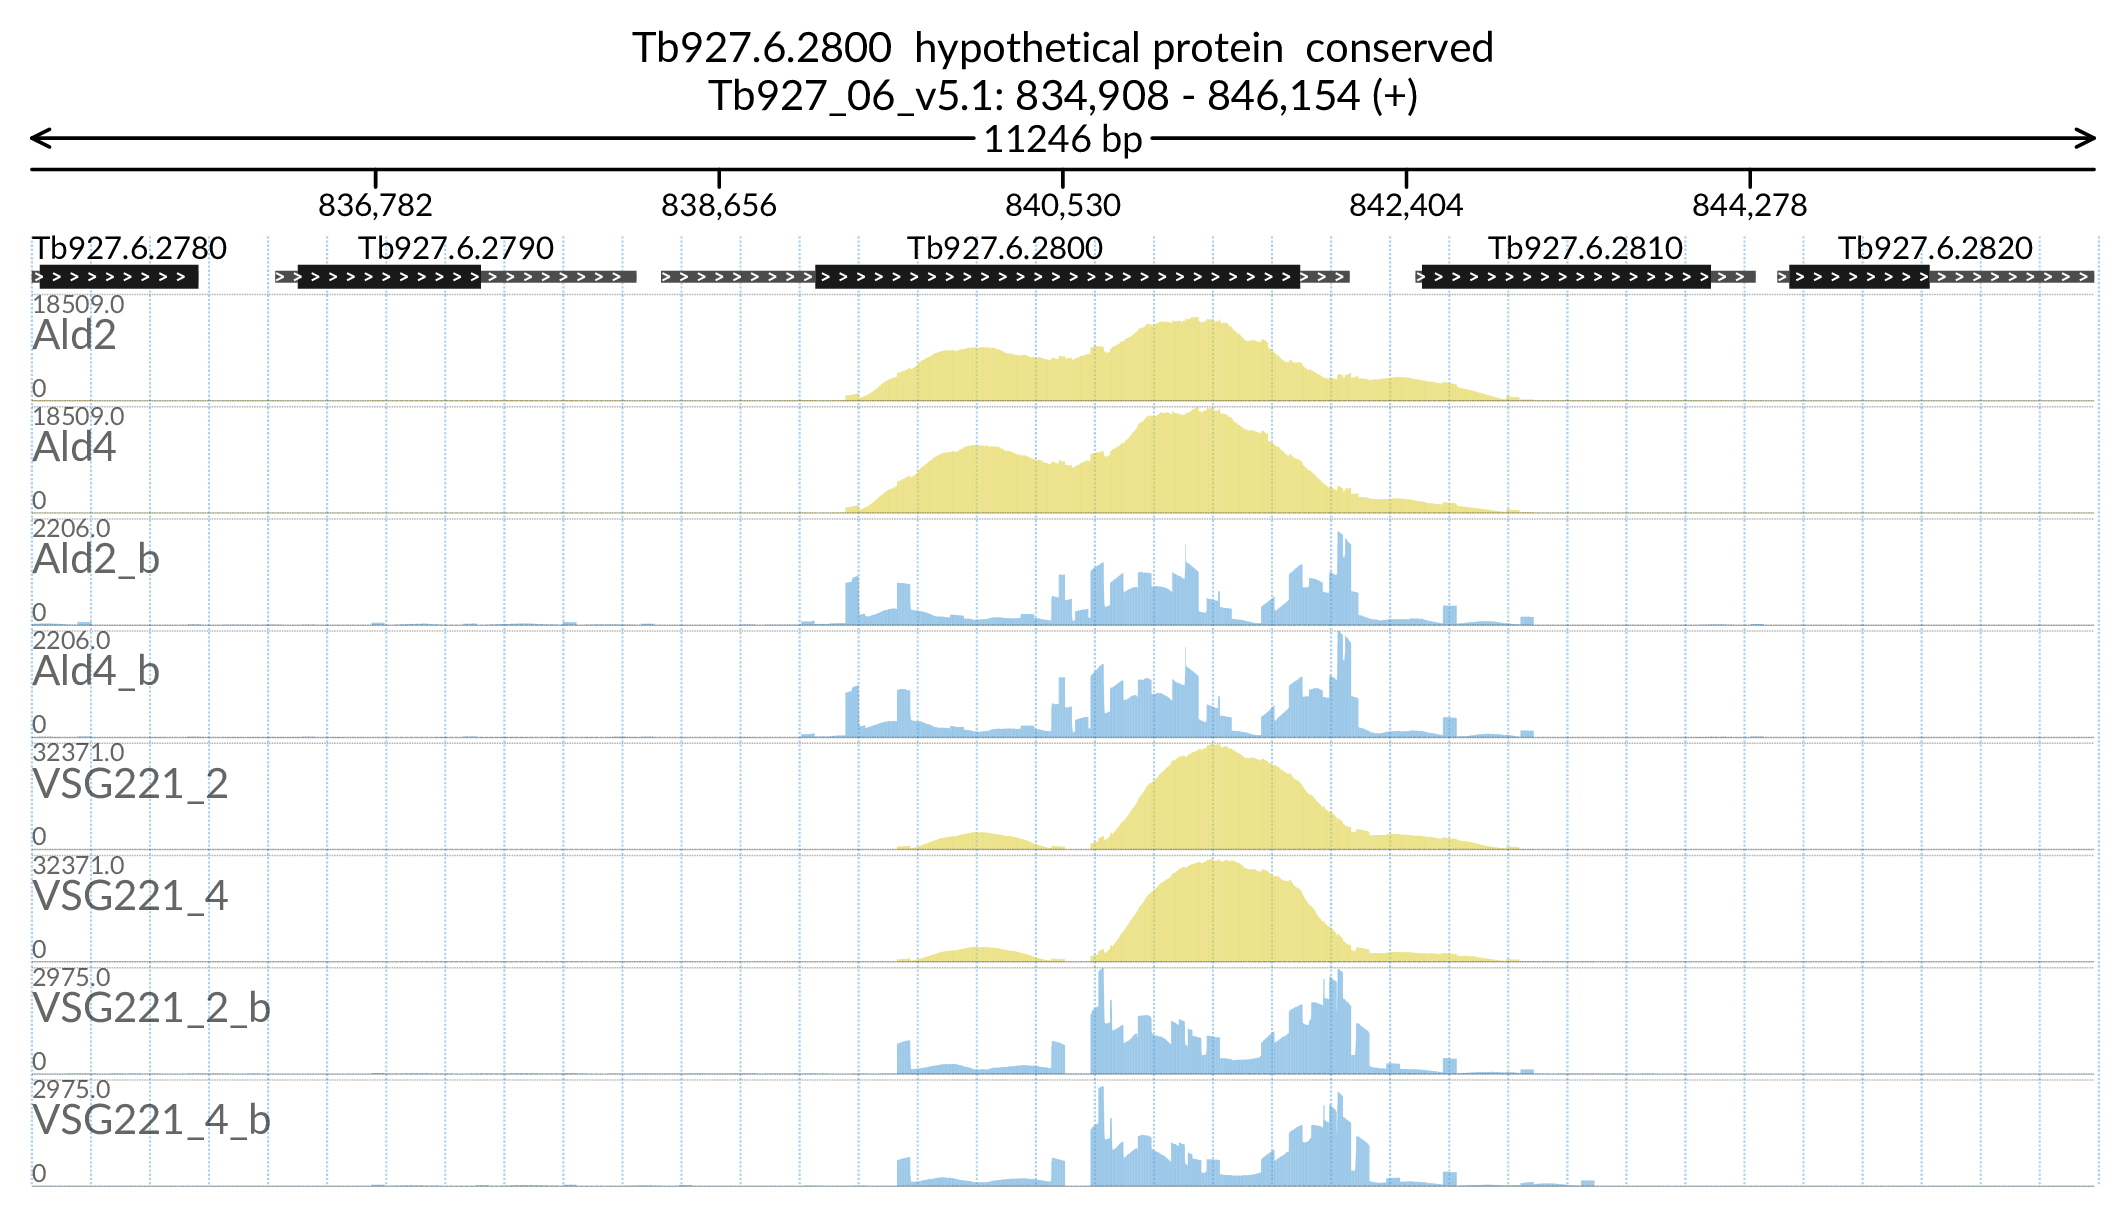

rm: cannot remove ‘/tmp/1075514.1.all.q/magick-*’: No such file or directory


In [52]:
plot_genep('Tb927.6.2800', max_cov='region', 
               extend=2, exp='paperFigBar', 
               do_display=True, limit=None,
            #max_cov=='region'
               gtf=False, add_aa=False, bg_groups=[[0,1],[2,3],[4,5],[6,7]]
          )



In [41]:
import itertools

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [42]:
coords = [('Tb927_01_v5.1',780179,785416),
('Tb927_02_v5.1',290326,298494),
('Tb927_03_v5.1',884223,891983),
('Tb927_04_v5.1', 954159,957772),
('Tb927_05_v5.1',197919,199815),
('Tb927_06_v5.1', 59066,64433),
('Tb927_07_v5.1', 1936979,1940105),
('Tb927_08_v5.1', 2233201,2233419)]

coord = ('Tb927_01_v5.1',780179,785416)
exp='paperFig'
bg_groups = [[0,1,2]]
plot_region(coord[0], coord[1], coord[2], coord[0], exp_dict=exp_dict,
                max_cov='limit', extend=1, exp=exp, 
                do_display=True, limit=100,
                add_transcripts=False, gtf=False, add_aa=False, bg_groups=bg_groups)

coord=('Tb927_02_v5.1',290326,298494)
exp='paperFig'
bg_groups = [[0,1,2]]
plot_region(coord[0], coord[1], coord[2], coord[0], exp_dict=exp_dict,
                max_cov='limit', extend=1, exp=exp, 
                do_display=True, limit=200,
                add_transcripts=False, gtf=False, add_aa=False, bg_groups=bg_groups)

coord =('Tb927_03_v5.1',884223,891983)
exp='paperFig'
bg_groups = [[0,1,2]]
plot_region(coord[0], coord[1], coord[2], coord[0], exp_dict=exp_dict,
                max_cov='limit', extend=1, exp=exp, 
                do_display=True, limit=1000,
                add_transcripts=False, gtf=False, add_aa=False, bg_groups=bg_groups)

coord = ('Tb927_04_v5.1', 954159,957772)
exp='paperFig'
bg_groups = [[0,1,2]]
plot_region(coord[0], coord[1], coord[2], coord[0], exp_dict=exp_dict,
                max_cov='limit', extend=1, exp=exp, 
                do_display=True, limit=4000,
                add_transcripts=False, gtf=False, add_aa=False, bg_groups=bg_groups)

coord =('Tb927_05_v5.1', 197919-4000, 199815+4000)
exp='paperFig'
bg_groups = [[0,1,2]]
plot_region(coord[0], coord[1], coord[2], coord[0], exp_dict=exp_dict,
                max_cov='limit', extend=1, exp=exp, 
                do_display=True, limit=300,
                add_transcripts=False, gtf=False, add_aa=False, bg_groups=bg_groups)

coord =('Tb927_06_v5.1', 59066,64433)
exp='paperFig'
bg_groups = [[0,1,2]]
plot_region(coord[0], coord[1], coord[2], coord[0], exp_dict=exp_dict,
                max_cov='limit', extend=1, exp=exp, 
                do_display=True, limit=1000,
                add_transcripts=False, gtf=False, add_aa=False, bg_groups=bg_groups)

coord = ('Tb927_07_v5.1', 1936979,1940105)
exp='paperFig'
bg_groups = [[0,1,2]]
plot_region(coord[0], coord[1], coord[2], coord[0], exp_dict=exp_dict,
                max_cov='limit', extend=1, exp=exp, 
                do_display=True, limit=600,
                add_transcripts=False, gtf=False, add_aa=False, bg_groups=bg_groups)

coord = ('Tb927_08_v5.1', 2233201-1000,2233419+1000)
exp='paperFig'
bg_groups = [[0,1,2]]
plot_region(coord[0], coord[1], coord[2], coord[0], exp_dict=exp_dict,
                max_cov='limit', extend=1, exp=exp, 
                do_display=True, limit=200,
                add_transcripts=False, gtf=False, add_aa=False, bg_groups=bg_groups)

In [53]:
ls $TMPDIR/fig_out

Tb927.11.16130_paperFigBar.pdf  Tb927.6.2800_paperFig.png
Tb927.11.16130_paperFigBar.png  Tb927.6.2900_paperFigBar.pdf
Tb927.6.2800_paperFigBar.pdf    Tb927.6.2900_paperFigBar.png
Tb927.6.2800_paperFigBar.png    Tb927.6.2900_paperFig.pdf
Tb927.6.2800_paperFig.pdf       Tb927.6.2900_paperFig.png


In [54]:
!tar -czvf fig.927.pdf.tar.gz $TMPDIR/fig_out/*.pdf --remove-files

tar: Removing leading `/' from member names
/tmp/1075514.1.all.q/fig_out/Tb927.11.16130_paperFigBar.pdf
/tmp/1075514.1.all.q/fig_out/Tb927.6.2800_paperFigBar.pdf
/tmp/1075514.1.all.q/fig_out/Tb927.6.2800_paperFig.pdf
/tmp/1075514.1.all.q/fig_out/Tb927.6.2900_paperFigBar.pdf
/tmp/1075514.1.all.q/fig_out/Tb927.6.2900_paperFig.pdf


In [49]:
!samtools mpileup --positions centromeres_coords.bed --output-MQ\
--fasta-ref genomes/tb927_10/tb927_10.fa \
H4_KO_c1/res2/H4_KO_c1/H4_KO_c1_sorted.bam > centromeres.pilup

[mpileup] 1 samples in 1 input files


In [50]:
!head centromeres.pilup

Tb927_01_v5.1	780180	C	27	,$,$,$,,,,,,.,,,.,,.,.,,......	CC.FFFFEFFFEFCAFFFFFFFDGGGF	2,3/2M/,,,,22,,2,,,,,,,,,,#
Tb927_01_v5.1	780181	T	24	,,,,,,.cc,Ccc.,C,cC.C...	@AEEE.FF0F>DEGBFFBFEFGGF	/2M/,,,,22,,2,,,,,,,,,,#
Tb927_01_v5.1	780182	C	24	,,,,,,.,,,.,,.,.,,......	FDEFFBEEEDEDFFGCFFG@GFG6	/2M/,,,,22,,2,,,,,,,,,,#
Tb927_01_v5.1	780183	A	25	,$,,,,,.,,,.,,.,.,,......,	EFFFFGDF3FFEFFFFFFG>FFGFE	/2M/,,,,22,,2,,,,,,,,,,#,
Tb927_01_v5.1	780184	T	24	,,,,,.,,,.,,.,.,,......,	FFFFB:FEFEEDFFFFEFCFFGEC	2M/,,,,22,,2,,,,,,,,,,#,
Tb927_01_v5.1	780185	T	24	,,,,,.,,,.,,.,.,,......,	FDFFGFG@FFEFFFFGFFFDGFF>	2M/,,,,22,,2,,,,,,,,,,#,
Tb927_01_v5.1	780186	A	23	,$,$,,.,,,.,,.,.,,......,	E7F?FF.FFFFGFFGFFFFFGDF	2/,,,,22,,2,,,,,,,,,,#,
Tb927_01_v5.1	780187	G	20	aaAaaaAaaAaAaaAAAAAA	EFFE5F=CFEFFEFFDFFG.	,,,,22,,2,,,,,,,,,,#
Tb927_01_v5.1	780188	C	21	,,.,,,.,,.,.,,......,	FGGF:F6BEEGFGFG5FFGDA	,,,,22,,2,,,,,,,,,,#,
Tb927_01_v5.1	780189	A	21	,,.,,,.,,.,.,,......,	F8FFFFEDFGFGFFG0FGGCF	,,,,22,,2,,,,,,,,,,#,


In [41]:
!head centromeres.pilup

Tb927_01_v5.1	780180	C	27	,$,$,$,,,,,,.,,,.,,.,.,,......	CC.FFFFEFFFEFCAFFFFFFFDGGGF
Tb927_01_v5.1	780181	T	24	,,,,,,.cc,Ccc.,C,cC.C...	@AEEE.FF0F>DEGBFFBFEFGGF
Tb927_01_v5.1	780182	C	24	,,,,,,.,,,.,,.,.,,......	FDEFFBEEEDEDFFGCFFG@GFG6
Tb927_01_v5.1	780183	A	25	,$,,,,,.,,,.,,.,.,,......,	EFFFFGDF3FFEFFFFFFG>FFGFE
Tb927_01_v5.1	780184	T	24	,,,,,.,,,.,,.,.,,......,	FFFFB:FEFEEDFFFFEFCFFGEC
Tb927_01_v5.1	780185	T	24	,,,,,.,,,.,,.,.,,......,	FDFFGFG@FFEFFFFGFFFDGFF>
Tb927_01_v5.1	780186	A	23	,$,$,,.,,,.,,.,.,,......,	E7F?FF.FFFFGFFGFFFFFGDF
Tb927_01_v5.1	780187	G	20	aaAaaaAaaAaAaaAAAAAA	EFFE5F=CFEFFEFFDFFG.
Tb927_01_v5.1	780188	C	21	,,.,,,.,,.,.,,......,	FGGF:F6BEEGFGFG5FFGDA
Tb927_01_v5.1	780189	A	21	,,.,,,.,,.,.,,......,	F8FFFFEDFGFGFFG0FGGCF


In [61]:
import numpy as np
import pandas as pd


In [67]:
import numpy as np
import pandas as pd
chros = []
bases = []
coverage = []
mean_q = []
count =0
for l in open('centromeres.pilup'):
    item_list = l.strip().split('\t')
    #print(len(item_list))
    if len(item_list) != 7:
        print(l)
    chros.append(item_list[0])
    bases.append(int(item_list[1]))
    mean_q.append(np.mean([ord(c) - 33 for c in item_list[6]]))
    coverage.append(len(item_list[6]))
mpileup_df = pd.DataFrame()
mpileup_df['chros']=chros
mpileup_df['bases']=bases
mpileup_df['coverage']=coverage
mpileup_df['mean_q']=mean_q
mpileup_df.head()
    






,chros,bases,coverage,mean_q
0,Tb927_01_v5.1,780180,27,13.481481
1,Tb927_01_v5.1,780181,24,13.250000
2,Tb927_01_v5.1,780182,24,13.250000
3,Tb927_01_v5.1,780183,25,13.160000
4,Tb927_01_v5.1,780184,24,13.125000


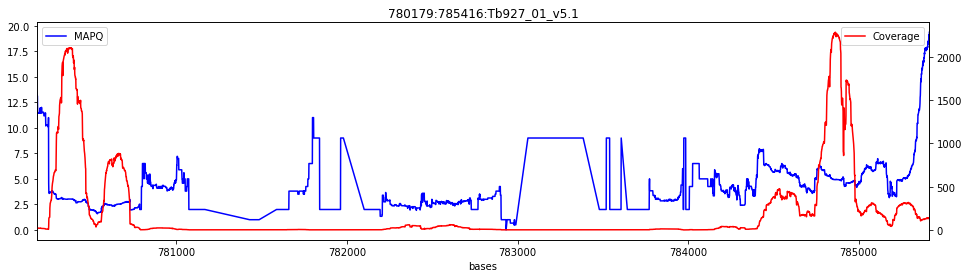

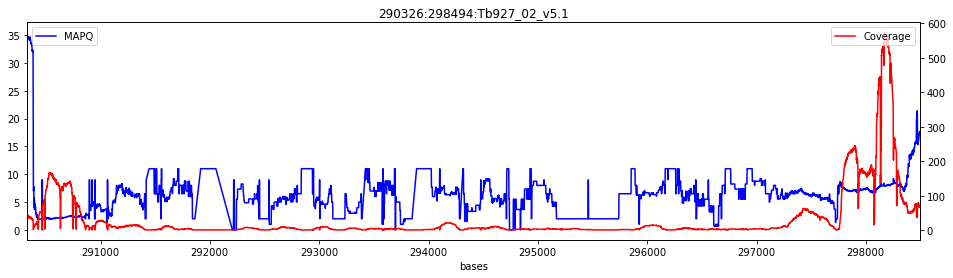

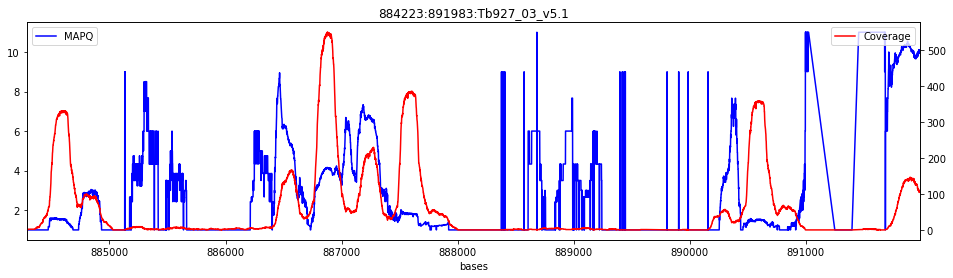

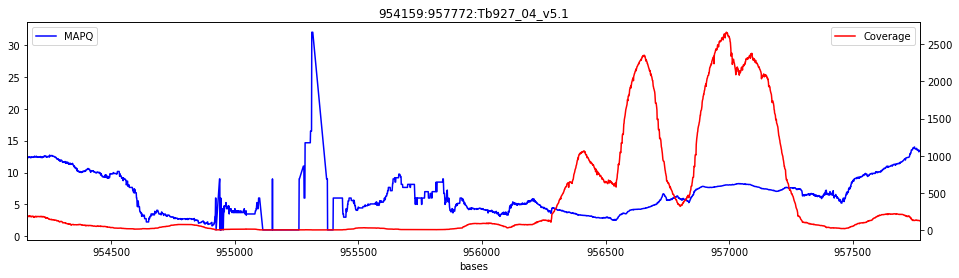

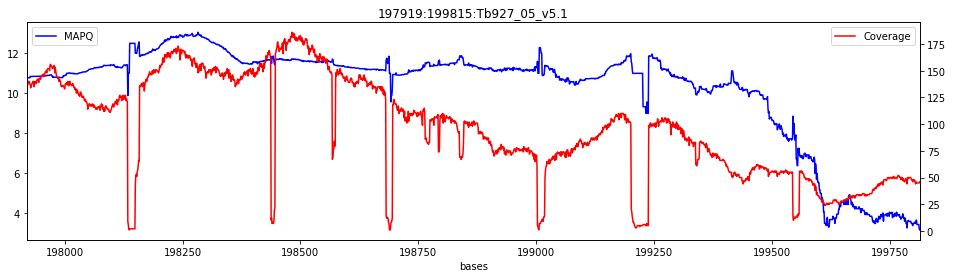

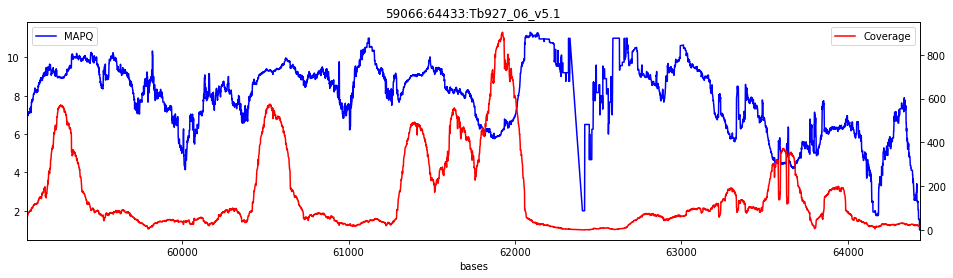

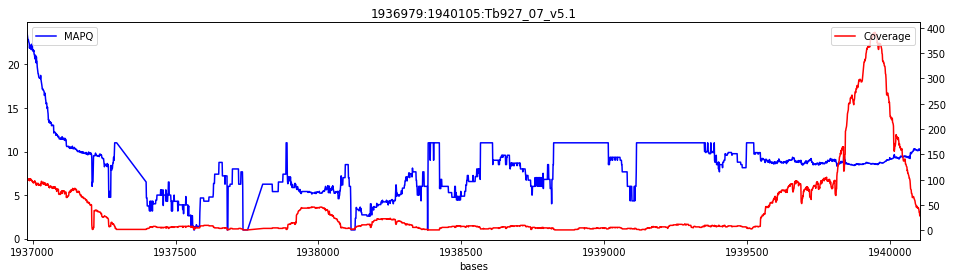

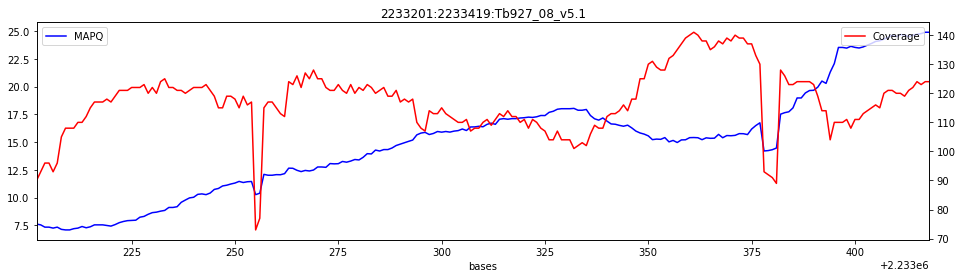

In [83]:
import matplotlib.pyplot as plt

for coord in coords:
    fig,ax=plt.subplots(figsize=(16,4))
    chro,start,end=coord[0],coord[1],coord[2]
    mpileup_df[(mpileup_df['chros']==chro) & 
              (mpileup_df['bases']>start) & 
              (mpileup_df['bases']<end) ].plot(kind='line',x='bases',y='mean_q',
                                                  ax=ax,c='blue',label='MAPQ')
    ax.legend(loc=2)
    ax2=ax.twinx()     
    mpileup_df[(mpileup_df['chros']==chro) & 
              (mpileup_df['bases']>start) & 
              (mpileup_df['bases']<end) ].plot(kind='line',x='bases',y='coverage',ax=ax2,
                                                  c='red',label='Coverage')
    ax2.legend(loc=1)
    plt.title(':'.join(str(n) for n in [start,end,chro]))
    plt.show()

In [ ]:
('Tb927_02_v5.1',290326,298494),


[0, 1, 2]


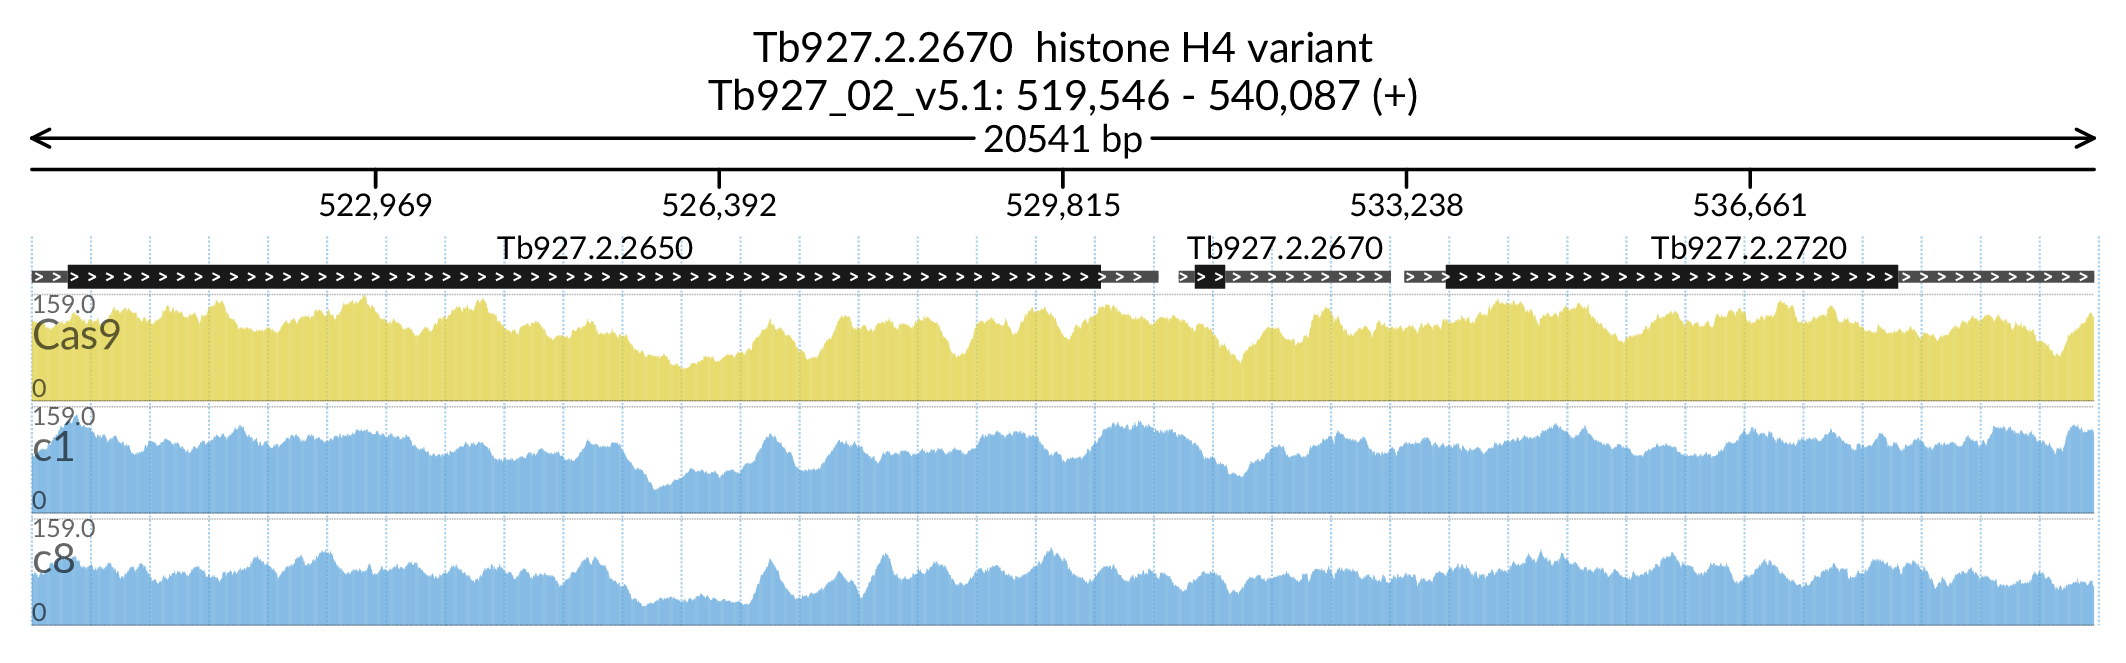

rm: cannot remove ‘/tmp/160306.1.all.q/magick-*’: No such file or directory



In [39]:
import warnings
warnings.filterwarnings("ignore")
done = 0

bg_groups = [[0,1,2]]
for gene in tqdm.tqdm_notebook(['Tb927.2.2670']):
    exp='paperFig'
    plot_genep(gene,extend=1, max_cov='region', bg_groups=bg_groups, exp=exp,add_aa=False,do_display=True)
    done+=1
    

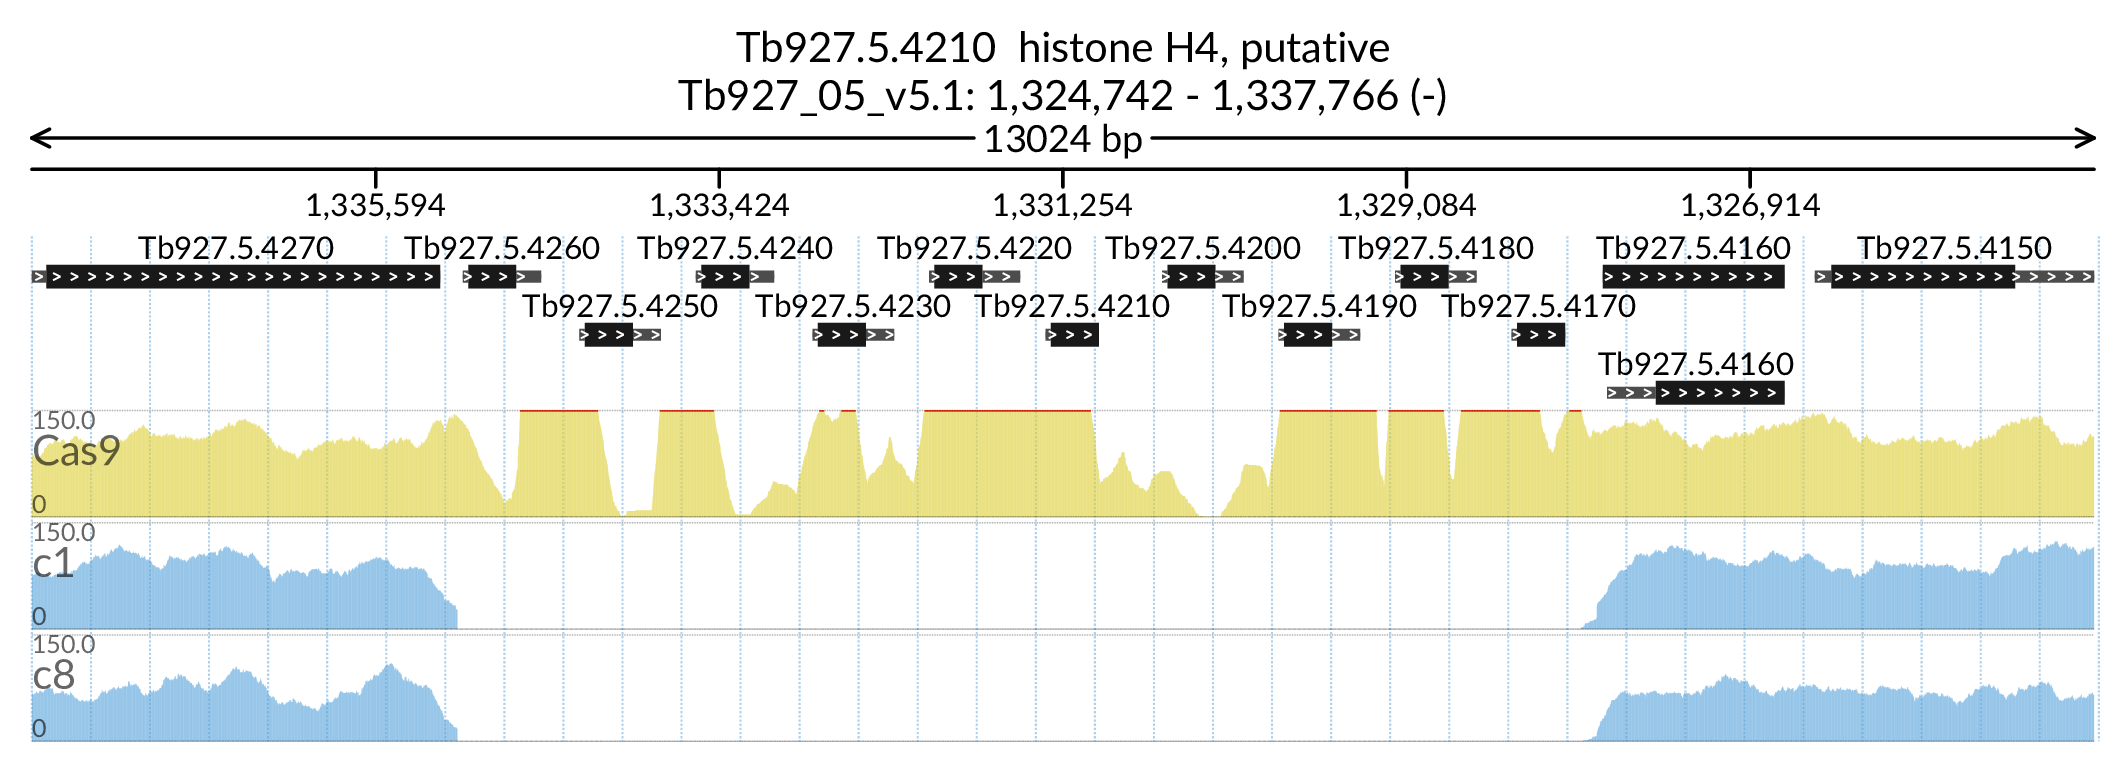

rm: cannot remove ‘/tmp/160306.1.all.q/magick-*’: No such file or directory



In [43]:
import warnings
warnings.filterwarnings("ignore")
done = 0

bg_groups = [[0,1,2]]
for gene in tqdm.tqdm_notebook(['Tb927.5.4210']):
    exp='paperFig'
    plot_genep(gene,extend=6, max_cov='limit',limit=150, 
               bg_groups=bg_groups, exp=exp,add_aa=False,do_display=True)
    done+=1



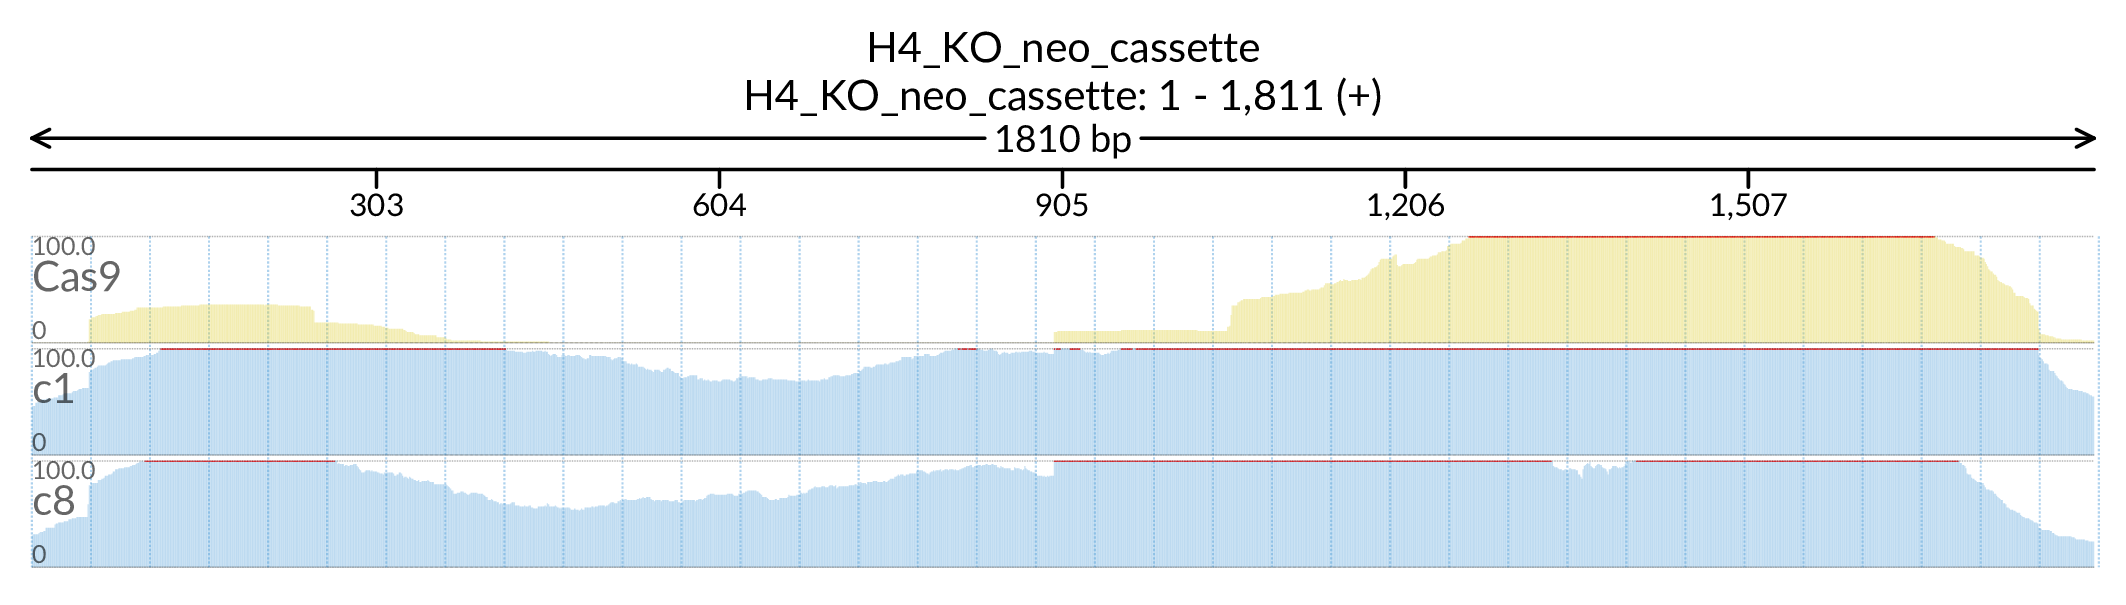

In [49]:
bg_groups = [[0,1,2]]
exp='paperFig'
plot_region('H4_KO_neo_cassette', 1, 1811, 'H4_KO_neo_cassette', exp_dict=exp_dict,
                max_cov='limit', extend=1, exp=exp, 
                do_display=True, limit=100,
                add_transcripts=False, gtf=False, add_aa=False, bg_groups=bg_groups)

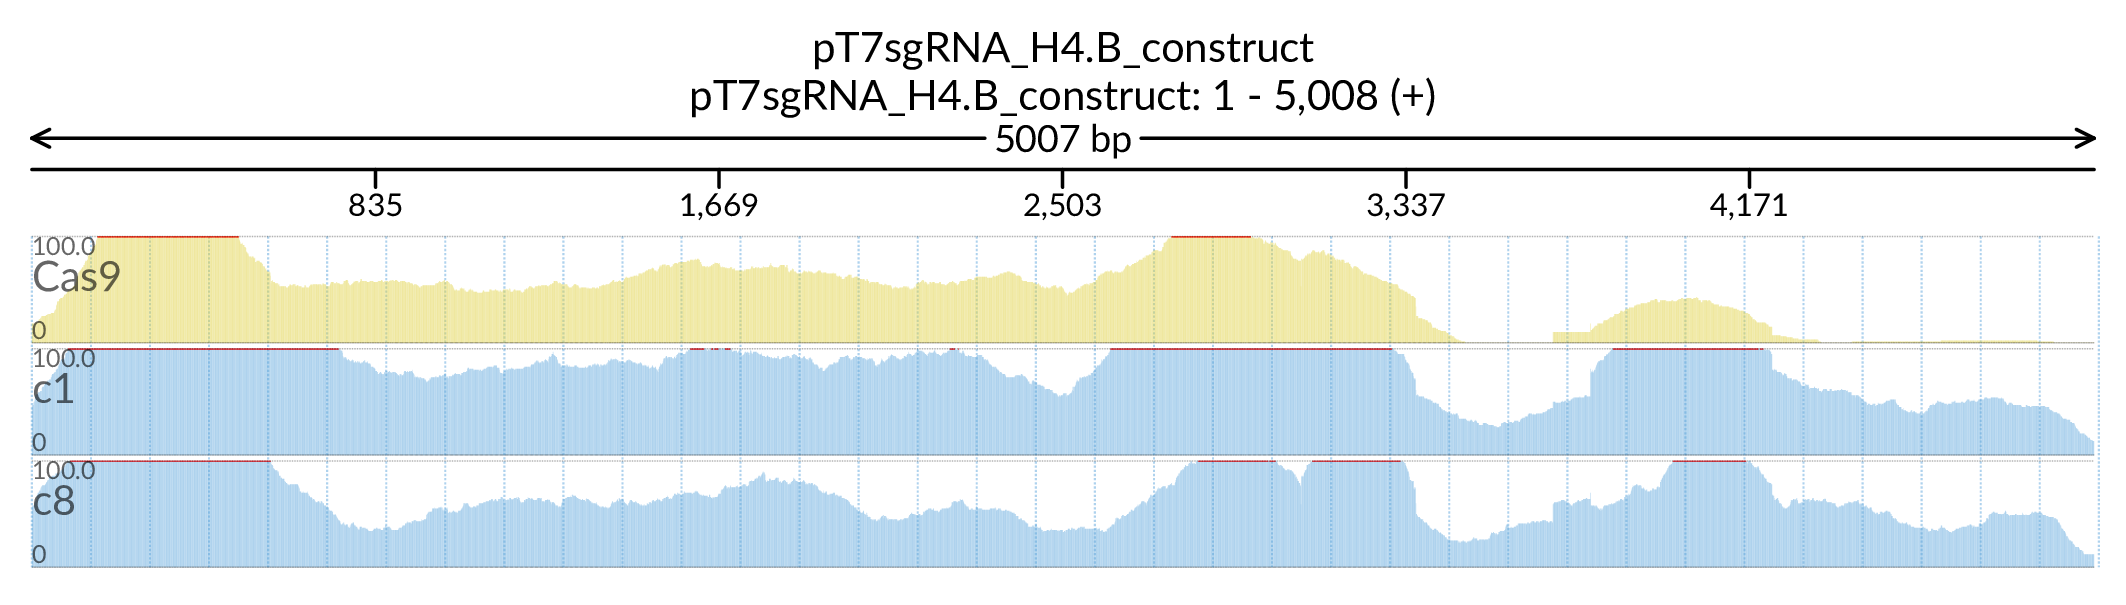

In [50]:
plot_region('pT7sgRNA_H4.B_construct', 1, 5008, 'pT7sgRNA_H4.B_construct', exp_dict=exp_dict,
                max_cov='limit', extend=1, exp=exp, 
                do_display=True, limit=100,
                add_transcripts=False, gtf=False, add_aa=False, bg_groups=bg_groups)

In [51]:
!ls $TMPDIR/fig_out

H4_KO_neo_cassette.pdf	     Tb927.2.2670_paperFig.pdf
H4_KO_neo_cassette.png	     Tb927.2.2670_paperFig.png
pT7sgRNA_H4.B_construct.pdf  Tb927.5.4170_paperFig.pdf
pT7sgRNA_H4.B_construct.png  Tb927.5.4170_paperFig.png
Tb927.11.12100_paperFig.pdf  Tb927.5.4210_paperFig.pdf
Tb927.11.12100_paperFig.png  Tb927.5.4210_paperFig.png


In [28]:
#!cp $TMPDIR/fig_out/mainVSG-427-2_paperFigSL.png Figures
#!cp $TMPDIR/fig_out/Tb927.11.12100_paperFigSL.png Figures

In [29]:
#!cp $TMPDIR/fig_out/mainVSG-427-2_paperFig.png Figures


In [31]:
#!mv $TMPDIR/fig.png.tar.gz Figures/fig.png.tar.gz

In [52]:
!tar -czvf fig.927.tar.gz $TMPDIR/fig_out/*.png --remove-files

tar: Removing leading `/' from member names
/tmp/160306.1.all.q/fig_out/H4_KO_neo_cassette.png
/tmp/160306.1.all.q/fig_out/pT7sgRNA_H4.B_construct.png
/tmp/160306.1.all.q/fig_out/Tb927.11.12100_paperFig.png
/tmp/160306.1.all.q/fig_out/Tb927.2.2670_paperFig.png
/tmp/160306.1.all.q/fig_out/Tb927.5.4170_paperFig.png
/tmp/160306.1.all.q/fig_out/Tb927.5.4210_paperFig.png


In [53]:
!ls $TMPDIR/fig_out/

H4_KO_neo_cassette.pdf	     Tb927.2.2670_paperFig.pdf
pT7sgRNA_H4.B_construct.pdf  Tb927.5.4170_paperFig.pdf
Tb927.11.12100_paperFig.pdf  Tb927.5.4210_paperFig.pdf


In [83]:
!bedtools genomecov \
-ibam Ald4/res/Ald4/Ald4_sorted_dedup_F_plus_R.bam \
-d -pc > Ald4/res/Ald4/Ald4_sorted_dedup_F_plus_R.bed

In [106]:
!bedtools genomecov \
-ibam Ald2/res/Ald2/Ald2_sorted_dedup_F_plus_R.bam \
-d -pc > Ald2/res/Ald2/Ald2_sorted_dedup_F_plus_R.bed

In [107]:
!bedtools genomecov \
-ibam VSG221_2/res/VSG221_2/VSG221_2_sorted_dedup_F_plus_R.bam \
-d -pc > VSG221_2/res/VSG221_2/VSG221_2_sorted_dedup_F_plus_R.bed

In [108]:
!bedtools genomecov \
-ibam VSG221_4/res/VSG221_4/VSG221_4_sorted_dedup_F_plus_R.bam \
-d -pc > VSG221_4/res/VSG221_4/VSG221_4_sorted_dedup_F_plus_R.bed

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [84]:
exp = 'Ald4'
out = 'res'
path_bed = os.path.join(exp,out,exp) +'/{exp}_sorted_dedup_F_plus_R.bed'.format(exp=exp)
path_bed

'Ald4/res/Ald4/Ald4_sorted_dedup_F_plus_R.bed'

In [86]:
!head 'Ald4/res/Ald4/Ald4_sorted_dedup_F_plus_R.bed'

Tb927_01_v5.1	1	0
Tb927_01_v5.1	2	0
Tb927_01_v5.1	3	0
Tb927_01_v5.1	4	0
Tb927_01_v5.1	5	0
Tb927_01_v5.1	6	0
Tb927_01_v5.1	7	0
Tb927_01_v5.1	8	2
Tb927_01_v5.1	9	2
Tb927_01_v5.1	10	2


In [120]:
def get_chr_coverage(path_to_bed, chrom_to_use):
    df = pd.read_csv(path_bed,sep='\t',header=None)
    df.columns = ['chrom','start','cov']
    
    chrom_size = df.groupby('chrom').size().sort_values()
    chrom_size = chrom_size.iloc[:-1]
    chrom_id_to_size = {int(n.split('_')[1]):v for (n,v) in zip(chrom_size.index.values, chrom_size.values)}
    
    df=df[df['chrom'].isin(chr_to_use)]
    df['abs_start']=np.arange(df.shape[0])
    df['rolling']=df.groupby('chrom')['cov'].rolling(window=500).mean().values
    df['rolling']=df['rolling'].bfill()
    df['rolling']=df['rolling']-df['rolling'].mean()
    df['rolling'][df['rolling']<0]=0
    df['rolling']=df['rolling']/df['rolling'].max()
    
    
    boundaries = df.groupby('chrom')['abs_start'].max().to_frame()
    boundaries['start']=boundaries['abs_start'].shift(1)
    boundaries=boundaries.fillna(0)
    
    return df,boundaries
    
    

In [87]:
df = pd.read_csv(path_bed,sep='\t',header=None)
df.columns = ['chrom','start','cov']
df.head()

,chrom,start,cov
0,Tb927_01_v5.1,1,0
1,Tb927_01_v5.1,2,0
2,Tb927_01_v5.1,3,0
3,Tb927_01_v5.1,4,0
4,Tb927_01_v5.1,5,0


In [88]:
chrom_size = df.groupby('chrom').size().sort_values().tail(12)
#remove 11 bin (the largest)
chrom_size = chrom_size.iloc[:-1]
chrom_id_to_size = {int(n.split('_')[1]):v for (n,v) in zip(chrom_size.index.values,chrom_size.values)}
chrom_size

chrom
Tb927_01_v5.1    1064672
Tb927_02_v5.1    1193948
Tb927_04_v5.1    1590432
Tb927_06_v5.1    1618915
Tb927_03_v5.1    1653225
Tb927_05_v5.1    1802303
Tb927_07_v5.1    2205233
Tb927_08_v5.1    2481190
Tb927_09_v5.1    3542885
Tb927_10_v5.1    4144375
Tb927_11_v5.1    5223313
dtype: int64

In [89]:
chrom_id_to_size

{1: 1064672,
 2: 1193948,
 4: 1590432,
 6: 1618915,
 3: 1653225,
 5: 1802303,
 7: 2205233,
 8: 2481190,
 9: 3542885,
 10: 4144375,
 11: 5223313}

In [ ]:
chr_to_use = ['Tb927_01_v5.1', 'Tb927_02_v5.1', 'Tb927_03_v5.1', 'Tb927_04_v5.1',
       'Tb927_05_v5.1', 'Tb927_06_v5.1', 'Tb927_07_v5.1', 'Tb927_08_v5.1',
       'Tb927_09_v5.1', 'Tb927_10_v5.1', 'Tb927_11_v5.1']

In [90]:
print(df.shape)
df=df[df['chrom'].isin(chr_to_use)]
print(df.shape)

(36570775, 3)
(26520491, 3)


array(['Tb927_01_v5.1', 'Tb927_02_v5.1', 'Tb927_03_v5.1', 'Tb927_04_v5.1',
       'Tb927_05_v5.1', 'Tb927_06_v5.1', 'Tb927_07_v5.1', 'Tb927_08_v5.1',
       'Tb927_09_v5.1', 'Tb927_10_v5.1', 'Tb927_11_v5.1'], dtype=object)

In [92]:
df['abs_start']=np.arange(df.shape[0])
df.head()




,chrom,start,cov,abs_start
0,Tb927_01_v5.1,1,0,0
1,Tb927_01_v5.1,2,0,1
2,Tb927_01_v5.1,3,0,2
3,Tb927_01_v5.1,4,0,3
4,Tb927_01_v5.1,5,0,4


In [93]:
#df.groupby('chrom')['cov'].rolling(window=2000).mean().shape,df.shape

((26520491,), (26520491, 4))

In [94]:
df['rolling']=df.groupby('chrom')['cov'].rolling(window=500).mean().values
df.head()

,chrom,start,cov,abs_start,rolling
0,Tb927_01_v5.1,1,0,0,NaN
1,Tb927_01_v5.1,2,0,1,NaN
2,Tb927_01_v5.1,3,0,2,NaN
3,Tb927_01_v5.1,4,0,3,NaN
4,Tb927_01_v5.1,5,0,4,NaN


In [70]:
df['rolling']=df['rolling'].bfill()
df.head()

,chrom,start,cov,abs_start,rolling
0,Tb927_01_v5.1,1,0,0,2.776
1,Tb927_01_v5.1,2,0,1,2.776
2,Tb927_01_v5.1,3,0,2,2.776
3,Tb927_01_v5.1,4,0,3,2.776
4,Tb927_01_v5.1,5,0,4,2.776


In [95]:
df['rolling']=df['rolling']-df['rolling'].mean()
df.head()

,chrom,start,cov,abs_start,rolling
0,Tb927_01_v5.1,1,0,0,NaN
1,Tb927_01_v5.1,2,0,1,NaN
2,Tb927_01_v5.1,3,0,2,NaN
3,Tb927_01_v5.1,4,0,3,NaN
4,Tb927_01_v5.1,5,0,4,NaN


In [96]:
df['rolling'][df['rolling']<0]=0
df['rolling'].head()

/homes/mtinti/miniconda3/envs/visCov/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: rolling, dtype: float64

In [97]:
max_value = df['rolling'].max()

In [98]:
df['rolling']=df['rolling']/df['rolling'].max()
df.head()

,chrom,start,cov,abs_start,rolling
0,Tb927_01_v5.1,1,0,0,NaN
1,Tb927_01_v5.1,2,0,1,NaN
2,Tb927_01_v5.1,3,0,2,NaN
3,Tb927_01_v5.1,4,0,3,NaN
4,Tb927_01_v5.1,5,0,4,NaN


In [99]:
boundaries = df.groupby('chrom')['abs_start'].max().to_frame()
boundaries['start']=boundaries['abs_start'].shift(1)
boundaries=boundaries.fillna(0)
boundaries

,abs_start,start
chrom,,
Tb927_01_v5.1,1064671,0.0
Tb927_02_v5.1,2258619,1064671.0
Tb927_03_v5.1,3911844,2258619.0
Tb927_04_v5.1,5502276,3911844.0
Tb927_05_v5.1,7304579,5502276.0
Tb927_06_v5.1,8923494,7304579.0
Tb927_07_v5.1,11128727,8923494.0
Tb927_08_v5.1,13609917,11128727.0
Tb927_09_v5.1,17152802,13609917.0


In [100]:
df.head()

,chrom,start,cov,abs_start,rolling
0,Tb927_01_v5.1,1,0,0,NaN
1,Tb927_01_v5.1,2,0,1,NaN
2,Tb927_01_v5.1,3,0,2,NaN
3,Tb927_01_v5.1,4,0,3,NaN
4,Tb927_01_v5.1,5,0,4,NaN


In [105]:
df['rolling'].median()

0.0

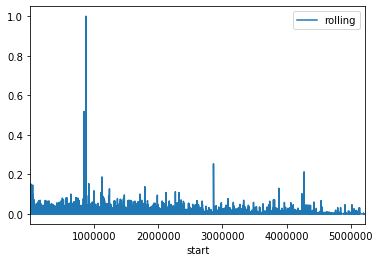

In [101]:
df.plot(kind='line',x='start',y='rolling')

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [3]:
def get_chr_coverage(path_to_bed, chrom_to_use):
    df = pd.read_csv(path_to_bed,sep='\t',header=None)
   
    df.columns = ['chrom','start','cov']
    
    chrom_size = df.groupby('chrom').size().sort_values()
    chrom_size = chrom_size.iloc[:-1]
    chrom_id_to_size = {int(n.split('_')[1]):v for (n,v) in zip(chrom_size.index.values, chrom_size.values) 
                       if n.startswith('Tb927_')}
    
    df=df[df['chrom'].isin(chrom_to_use)]
    df['abs_start']=np.arange(df.shape[0])
    df['rolling']=df.groupby('chrom')['cov'].rolling(window=500).mean().values
    df['rolling']=df['rolling'].bfill()
    df['rolling']=df['rolling']-df['rolling'].mean()
    max_value = df['rolling'].max()
    df['rolling'][df['rolling']<0]=0
    df['rolling']=df['rolling']/df['rolling'].max()
    
    
    boundaries = df.groupby('chrom')['abs_start'].max().to_frame()
    boundaries['start']=boundaries['abs_start'].shift(1)
    boundaries=boundaries.fillna(0)
    
    return df,boundaries,max_value

In [4]:
#def regress_ticks(tick_pos, tick_values, top, bottom):
    
    
    

In [5]:
def make_plot(boundaries,df,title,max_value):
#define Matplotlib figure and axis
    fig, ax = plt.subplots(figsize=(12,4))

    #create simple line plot
    ax.plot([0],[0])
        
    #add rectangle to plot

    for start,end,chrom in zip(boundaries['start'],boundaries['abs_start'],boundaries['abs_start'].index.values):   
        #ax.add_patch(Rectangle((start, -1), end, 1))
        ax.plot([0],[1.2])
        chrom = int(chrom.split('_')[1])
        length = (end-start)/2
        ax.text((end-length), -0.12, chrom)
        ax.vlines(start,ymin=-0.25,ymax=0)
        ax.vlines(end,ymin=-0.25,ymax=0)
        print(start,end,chrom,length)

    ax.hlines(0, xmin=0, xmax=end) 
    ax.hlines(-0.25, xmin=0, xmax=end)

    #ax2=ax.twinx()
    df.plot(kind='line',x='abs_start',y='rolling',ax=ax,c='k')

    ax.spines['top'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_legend().remove()
    ax.set_xlabel('')
    plt.tick_params(top=False, bottom=True, left=True, right=False,
                labelleft=True, labelbottom=True)
    #ax.vlines(end,ymin=-1,ymax=1)    
    #display plot
    ytickslocs = ax.get_yticks()
    ytickslabel = ax.get_yticklabels()
    new_ylabels = [str(int(n * max_value)) if n > 0 else '' for n in ytickslocs]
    
    #ax.set_yticks(ytickslocs)
    ax.set_yticklabels(new_ylabels)
    
    
    #labels, locations = plt.yticks()
    #print(labels, locations)
    #plt.yticks(labels, labels/max(labels))

    
    #ax.set_yticklabels(new_ylabels)
    #plt.yticks(ytickslocs, new_ylabels)
    #ax.set_yticklabels(new_ylabels)
    #print(new_ylabels)
    #print(ytickslocs)
    #print(ytickslabel)
    plt.title(title)
    plt.savefig('coverage_' + title+'.svg')
    plt.show()
    
def make_zoom_plot(boundaries,df,chro,title,max_value):
    #define Matplotlib figure and axis
    fig, ax = plt.subplots(figsize=(12,4))

    #create simple line plot
    ax.plot([0],[0])

    #add rectangle to plot
    temp = boundaries.loc[chro].to_frame().T
    for start,end,chrom in zip(temp['start'],temp['abs_start'],temp['abs_start'].index.values):   
        #ax.add_patch(Rectangle((start, -1), end, 1))
        end = end-start
        start = 0

        #ax.plot([start],[1.2])
        chrom = int(chrom.split('_')[1])
        length = (end-start)/2
        ax.text((end-length), -0.12, chrom)
        ax.vlines(start,ymin=-0.25,ymax=0)
        ax.vlines(end,ymin=-0.25,ymax=0)
        print(start,end,chrom,length)

    ax.hlines(0, xmin=start, xmax=end) 
    ax.hlines(-0.25, xmin=start, xmax=end)

    #ax2=ax.twinx()
    df[df['chrom']==chro].plot(kind='line',x='start',y='rolling',ax=ax,c='k')
    #ax.set_xlim(start,end)
    ax.spines['top'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('')
    ax.get_legend().remove()
    plt.tick_params(top=False, bottom=True, left=True, right=False,
                labelleft=True, labelbottom=False)
    
    plt.tick_params(top=False, bottom=True, left=True, right=False,
                labelleft=True, labelbottom=True)
    #ax.vlines(end,ymin=-1,ymax=1)    
    #display plot
    ytickslocs = ax.get_yticks()
    ytickslabel = ax.get_yticklabels()
    new_ylabels = [str(int(n * max_value)) if n > 0 else '' for n in ytickslocs]
    
    #ax.set_yticks(ytickslocs)
    ax.set_yticklabels(new_ylabels)    
    #ax.vlines(end,ymin=-1,ymax=1)    
    #display plot
    plt.title(title)
    plt.savefig('coverage_zoom' + title+'.svg')
    plt.show()    


In [101]:

def make_plot_dev(boundaries,df,title,max_value,remove):
    df = df.copy(deep=True)
    boundaries = boundaries.copy(deep=True)
   
    
    
    fig, ax = plt.subplots(figsize=(12,4))
                             #ncols=1,nrows=2,
                             #gridspec_kw = {'wspace':0, 'hspace':0},
                            #sharex=True)
    
    #ax=axes[1]

    #create simple line plot
    ax.plot([0],[0])
        
    #add rectangle to plot


    
    

    #ax2=ax.twinx()
    #df.plot(kind='line',x='abs_start',y='rolling',ax=ax,c='k')


    plt.tick_params(top=False, bottom=False, left=True, right=False,
                labelleft=True, labelbottom=False)
    #ax.vlines(end,ymin=-1,ymax=1)    
    #display plot
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    #ax.get_legend().remove()
    ax.set_xlabel('')
    
    #ax2=ax.twinx()
    #ax=axes[0]
    #df['cov']
    
    df['rolling'] = df['rolling']*max_value
    df['rolling'] = df['rolling']-remove
    df['rolling'][df['rolling']<0]=0
    
    df.plot(kind='line',x='abs_start',y='rolling',ax=ax,c='k',label='Barcoded Reads')
    
    leg = plt.legend(loc=1)
    leg.get_frame().set_linewidth(0.0)
    
    #labels = [n.get_text() for n in ax.get_yticklabels()]
    #print('max_value',max_value, labels)
    
    box_end = (df['cov'].max()/10)*-1
    
    for start,end,chrom in zip(boundaries['start'],boundaries['abs_start'],boundaries['abs_start'].index.values):   
        #ax.add_patch(Rectangle((start, -1), end, 1))
        ax.plot([0],[1.2])
        chrom = int(chrom.split('_')[1])
        length = (end-start)/2
        ax.text((end-length), box_end/1.5, chrom)
        ax.vlines(start,ymin=box_end,ymax=0)
        ax.vlines(end,ymin=box_end,ymax=0)
        print(start,end,chrom,length)

    ax.hlines(0, xmin=0, xmax=end) 
    ax.hlines(box_end, xmin=0, xmax=end)    
    
    ytickslocs = ax.get_yticks()
    ytickslabel = ax.get_yticklabels()
    
    ytickslocs = [n for n in ytickslocs if n > 0]
    new_ylabels = [str(int(n)) for n in ytickslocs]
    
    ax.set_yticks(ytickslocs)
    ax.set_yticklabels(new_ylabels)
    
    #labels, locations = plt.yticks()
    #print(labels, locations)
    #plt.yticks(labels, labels/max(labels))

    #ax.set_yticklabels(new_ylabels)
    #plt.yticks(ytickslocs, new_ylabels)
    #ax.set_yticklabels(new_ylabels)
    #print(new_ylabels)
    #print(ytickslocs)
    #print(ytickslabel)
    plt.title(title)
    plt.savefig('coverage_' + title+'.svg')
    plt.show()
    
    
    
    
    

def make_zoom_plot_dev(boundaries,df,title,max_value,remove,chro):
    df = df.copy(deep=True)
    boundaries = boundaries.copy(deep=True)
    
    boundaries = boundaries.loc[chro].to_frame().T
    df = df[df['chrom']==chro]#.plot(kind='line',x='start',y='rolling',ax=ax,c='k')
    
    fig, ax = plt.subplots(figsize=(12,4))
                             #ncols=1,nrows=2,
                             #gridspec_kw = {'wspace':0, 'hspace':0},
                            #sharex=True)
    
    #ax=axes[1]

    #create simple line plot
    ax.plot([0],[0])
        
    #add rectangle to plot


    
    

    #ax2=ax.twinx()
    #df.plot(kind='line',x='abs_start',y='rolling',ax=ax,c='k')


    plt.tick_params(top=False, bottom=False, left=True, right=False,
                labelleft=True, labelbottom=False)
    #ax.vlines(end,ymin=-1,ymax=1)    
    #display plot
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    #ax.get_legend().remove()
    ax.set_xlabel('')
    
    #ax2=ax.twinx()
    #ax=axes[0]
    #df['cov']
    
    df['rolling'] = df['rolling']*max_value
    df['rolling'] = df['rolling']-remove
    df['rolling'][df['rolling']<0]=0
    
    df.plot(kind='line',x='start',y='rolling',ax=ax,c='k',label='Barcoded Reads')
    
    leg = plt.legend(loc=1)
    leg.get_frame().set_linewidth(0.0)
    
    #labels = [n.get_text() for n in ax.get_yticklabels()]
    #print('max_value',max_value, labels)
    
    box_end = (df['cov'].max()/10)*-1
    
    for start,end,chrom in zip(boundaries['start'],boundaries['abs_start'],boundaries['abs_start'].index.values):  
        
        end = end-start
        start = 0
        #ax.add_patch(Rectangle((start, -1), end, 1))
        #ax.plot([0],[1.2])
        chrom = int(chrom.split('_')[1])
        length = (end-start)/2
        ax.text((end-length), box_end/1.5, chrom)
        ax.vlines(start,ymin=box_end,ymax=0)
        ax.vlines(end,ymin=box_end,ymax=0)
        print(start,end,chrom,length)

    ax.hlines(0, xmin=0, xmax=end) 
    ax.hlines(box_end, xmin=0, xmax=end)    
    
    ytickslocs = ax.get_yticks()
    ytickslabel = ax.get_yticklabels()
    
    ytickslocs = [n for n in ytickslocs if n > 0]
    new_ylabels = [str(int(n)) for n in ytickslocs]
    
    ax.set_yticks(ytickslocs)
    ax.set_yticklabels(new_ylabels)
    
    #labels, locations = plt.yticks()
    #print(labels, locations)
    #plt.yticks(labels, labels/max(labels))

    #ax.set_yticklabels(new_ylabels)
    #plt.yticks(ytickslocs, new_ylabels)
    #ax.set_yticklabels(new_ylabels)
    #print(new_ylabels)
    #print(ytickslocs)
    #print(ytickslabel)
    plt.title(title)
    plt.savefig('coverage_' + title+'.svg')
    plt.show()

/homes/mtinti/miniconda3/envs/visCov/lib/python3.6/site-packages/ipykernel_launcher.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0 1618915.0 6 809457.5


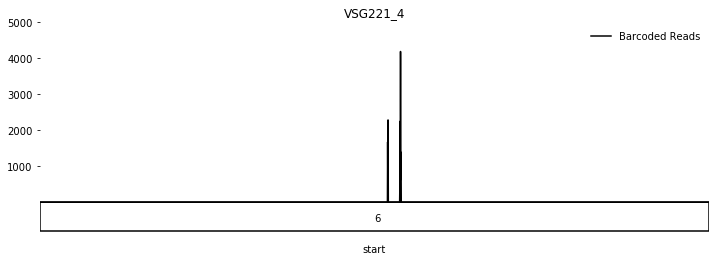

In [102]:
#make_zoom_plot_dev(boundaries, df, exp, max_value, 500, 'Tb927_06_v5.1')

/homes/mtinti/miniconda3/envs/visCov/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/homes/mtinti/miniconda3/envs/visCov/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.0 1064671 1 532335.5
1064671.0 2258619 2 596974.0
2258619.0 3911844 3 826612.5
3911844.0 5502276 4 795216.0
5502276.0 7304579 5 901151.5
7304579.0 8923494 6 809457.5
8923494.0 11128727 7 1102616.5
11128727.0 13609917 8 1240595.0
13609917.0 17152802 9 1771442.5
17152802.0 21297177 10 2072187.5
21297177.0 26520490 11 2611656.5


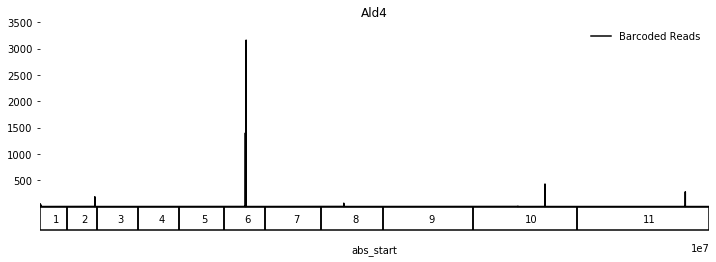

/homes/mtinti/miniconda3/envs/visCov/lib/python3.6/site-packages/ipykernel_launcher.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0 1618915.0 6 809457.5


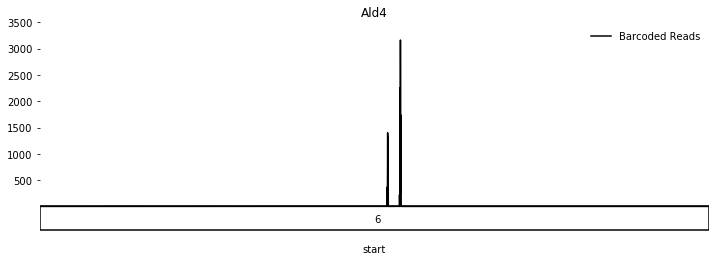

0.0 1064671 1 532335.5
1064671.0 2258619 2 596974.0
2258619.0 3911844 3 826612.5
3911844.0 5502276 4 795216.0
5502276.0 7304579 5 901151.5
7304579.0 8923494 6 809457.5
8923494.0 11128727 7 1102616.5
11128727.0 13609917 8 1240595.0
13609917.0 17152802 9 1771442.5
17152802.0 21297177 10 2072187.5
21297177.0 26520490 11 2611656.5


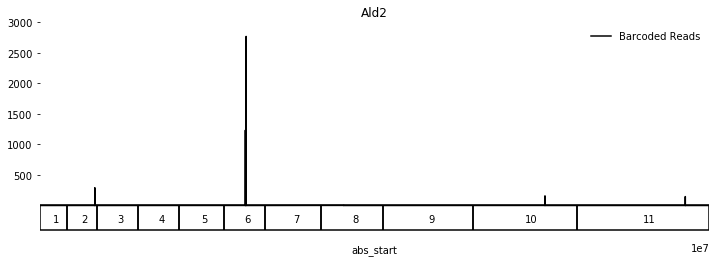

0 1618915.0 6 809457.5


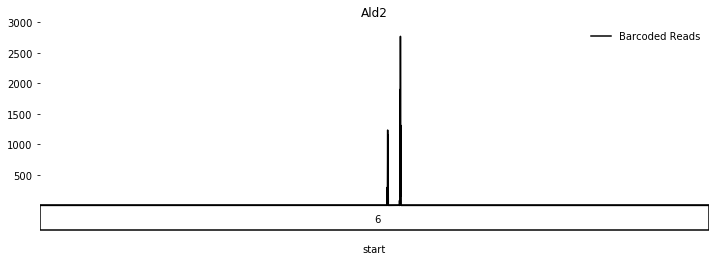

0.0 1064671 1 532335.5
1064671.0 2258619 2 596974.0
2258619.0 3911844 3 826612.5
3911844.0 5502276 4 795216.0
5502276.0 7304579 5 901151.5
7304579.0 8923494 6 809457.5
8923494.0 11128727 7 1102616.5
11128727.0 13609917 8 1240595.0
13609917.0 17152802 9 1771442.5
17152802.0 21297177 10 2072187.5
21297177.0 26520490 11 2611656.5


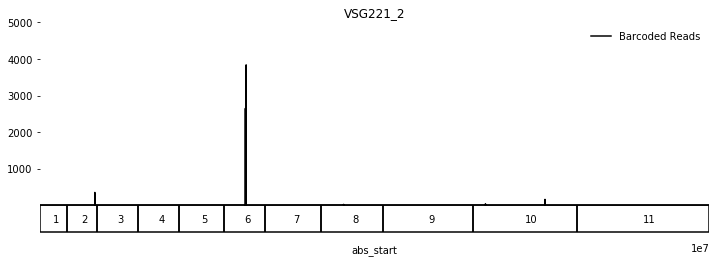

0 1618915.0 6 809457.5


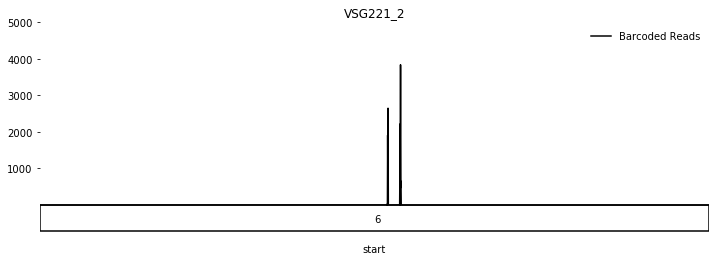

0.0 1064671 1 532335.5
1064671.0 2258619 2 596974.0
2258619.0 3911844 3 826612.5
3911844.0 5502276 4 795216.0
5502276.0 7304579 5 901151.5
7304579.0 8923494 6 809457.5
8923494.0 11128727 7 1102616.5
11128727.0 13609917 8 1240595.0
13609917.0 17152802 9 1771442.5
17152802.0 21297177 10 2072187.5
21297177.0 26520490 11 2611656.5


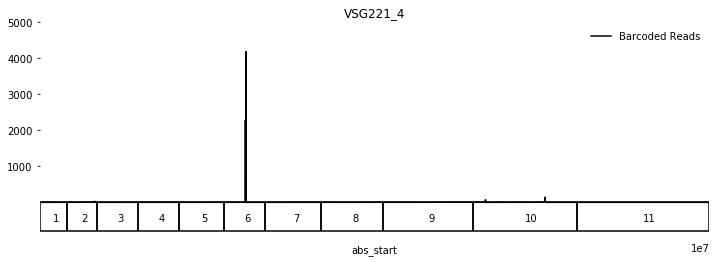

0 1618915.0 6 809457.5


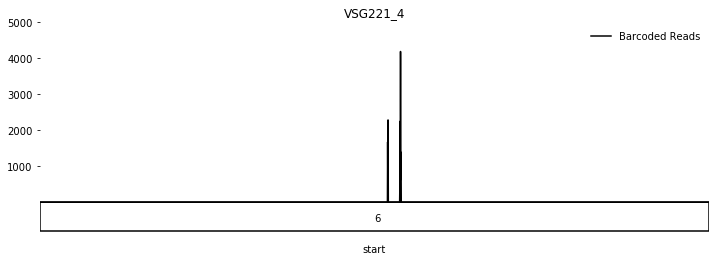

In [105]:
out = 'res'

chrom_to_use = ['Tb927_01_v5.1', 'Tb927_02_v5.1', 'Tb927_03_v5.1', 'Tb927_04_v5.1',
       'Tb927_05_v5.1', 'Tb927_06_v5.1', 'Tb927_07_v5.1', 'Tb927_08_v5.1',
       'Tb927_09_v5.1', 'Tb927_10_v5.1', 'Tb927_11_v5.1']

for exp in ['Ald4', 'Ald2', 'VSG221_2', 'VSG221_4']:
    path_to_bed = os.path.join(exp,out,exp) +'/{exp}_sorted_dedup_F_plus_R.bed'.format(exp=exp)    
    df, boundaries, max_value = get_chr_coverage(path_to_bed, chrom_to_use)
    
    make_plot_dev(boundaries, df, exp, max_value, 500)
    make_zoom_plot_dev(boundaries,df,exp,max_value,500, 'Tb927_06_v5.1')
    #make_plot(boundaries,df,exp,max_value)
    #make_zoom_plot(boundaries,df,'Tb927_06_v5.1',exp,max_value)  
    

In [2]:
#chrom_to_use

0.0 1064671 1 532335.5
1064671.0 2258619 2 596974.0
2258619.0 3911844 3 826612.5
3911844.0 5502276 4 795216.0
5502276.0 7304579 5 901151.5
7304579.0 8923494 6 809457.5
8923494.0 11128727 7 1102616.5
11128727.0 13609917 8 1240595.0
13609917.0 17152802 9 1771442.5
17152802.0 21297177 10 2072187.5
21297177.0 26520490 11 2611656.5


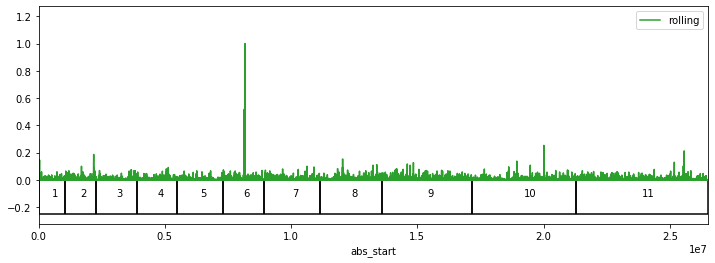

In [102]:


#define Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12,4))

#create simple line plot
ax.plot([0],[0])

#add rectangle to plot

for start,end,chrom in zip(boundaries['start'],boundaries['abs_start'],boundaries['abs_start'].index.values):   
    #ax.add_patch(Rectangle((start, -1), end, 1))
    ax.plot([0],[1.2])
    chrom = int(chrom.split('_')[1])
    length = (end-start)/2
    ax.text((end-length), -0.12, chrom)
    ax.vlines(start,ymin=-0.25,ymax=0)
    ax.vlines(end,ymin=-0.25,ymax=0)
    print(start,end,chrom,length)

ax.hlines(0, xmin=0, xmax=end) 
ax.hlines(-0.25, xmin=0, xmax=end)

#ax2=ax.twinx()
df.plot(kind='line',x='abs_start',y='rolling',ax=ax)


#ax.vlines(end,ymin=-1,ymax=1)    
#display plot
plt.show()

In [112]:
boundaries.loc['Tb927_06_v5.1'].to_frame().T

,abs_start,start
Tb927_06_v5.1,8923494.0,7304579.0


0 1618915.0 6 809457.5


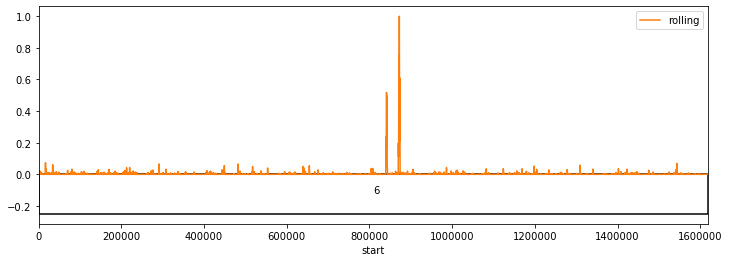

In [119]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

#define Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12,4))

#create simple line plot
ax.plot([0],[0])

#add rectangle to plot
temp = boundaries.loc['Tb927_06_v5.1'].to_frame().T
for start,end,chrom in zip(temp['start'],temp['abs_start'],temp['abs_start'].index.values):   
    #ax.add_patch(Rectangle((start, -1), end, 1))
    end = end-start
    start = 0
    
    #ax.plot([start],[1.2])
    chrom = int(chrom.split('_')[1])
    length = (end-start)/2
    ax.text((end-length), -0.12, chrom)
    ax.vlines(start,ymin=-0.25,ymax=0)
    ax.vlines(end,ymin=-0.25,ymax=0)
    print(start,end,chrom,length)

ax.hlines(0, xmin=start, xmax=end) 
ax.hlines(-0.25, xmin=start, xmax=end)

#ax2=ax.twinx()
df[df['chrom']=='Tb927_06_v5.1'].plot(kind='line',x='start',y='rolling',ax=ax)
#ax.set_xlim(start,end)

#ax.vlines(end,ymin=-1,ymax=1)    
#display plot
plt.show()

In [ ]:
bedtools genomecov \
-ibam $path_out$base_fastq'sorted_dedup.bam'  \
-d -pc > $path_out$base_fastq'sorted_dedup_d.bed'